<a href="https://colab.research.google.com/github/JulioLaz/movie_analysis/blob/main/Movie_Analysis_JAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor roi?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

### **Kaggle:**

1. https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

2. https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset

3. https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies


#**1. Configuración del Ambiente**


---




In [ ]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Python 3.10.12
# ------
# Name: pandas
# Version: 2.0.3
# ------
# Name: matplotlib
# Version: 3.7.1

In [104]:
def init_project():
    global warnings, np, pd, plt, ticker, sns, dd, drive, df_title_basics, df_title_ratings, df_tmdb, path_img

    import warnings
    import numpy as np
    import pandas as pd
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', '{:.3f}'.format)
    import matplotlib.pyplot as plt
    import matplotlib.patheffects as patheffects
    import matplotlib.ticker as ticker
    import seaborn as sns
    import dask.dataframe as dd
    from google.colab import drive
    from wordcloud import WordCloud
    import warnings
    warnings.filterwarnings('ignore')
    drive.mount('/content/drive')
    path_img = 'https://i0.wp.com/image.tmdb.org/t/p/w300'

init_project()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Subir de tu cuenta kaggle el archivo kaggle.json
1. Ve a tu perfil de Kaggle y descarga API key (kaggle.json).
2. En Colab, sube el archivo kaggle.json. Puedes hacerlo haciendo clic en el ícono de carpeta a la izquierda, luego en el ícono de subir (archivo con una flecha hacia arriba).

In [7]:
# Subir el archivo kaggle.json desde donde lo guardaste:
from google.colab import files

files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [11]:
### NOMBRE DE LA CARPETA DE KAGGLE:
### ingresar nombre despues de las url https://www.kaggle.com/datasets/.........
!kaggle datasets download -d ashirwadsangwan/imdb-dataset  ### 2Gigabyte
!unzip imdb-dataset.zip

!kaggle datasets download -d rounakbanik/the-movies-dataset  ### 239megabyte
!unzip the-movies-dataset.zip

# # https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies  ### 193megabyte
!unzip tmdb-movies-dataset-2023-930k-movies.zip

Dataset URL: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
License(s): other
100% 1.44G/1.44G [00:22<00:00, 98.6MB/s]
100% 1.44G/1.44G [00:22<00:00, 67.4MB/s]
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv         
  inflating: title.akas.tsv          
  inflating: title.basics.tsv        
  inflating: title.principals.tsv    
  inflating: title.ratings.tsv       


#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [4]:
df_title_basics = dd.read_csv(r'/content/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [ ]:
df_title_basics.shape[0].compute()

10843834

In [ ]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

tconst titleType             primaryTitle  \
645107  tt10872600     movie  Spider-Man: No Way Home   

                  originalTitle isAdult startYear endYear runtimeMinutes  \
645107  Spider-Man: No Way Home       0      2021      \N            148   

                          genres  
645107  Action,Adventure,Fantasy

In [12]:
df_title_ratings = dd.read_csv(r'/content/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

tconst  averageRating  numVotes
0  tt0000001          5.700      2059
1  tt0000002          5.600       277
2  tt0000003          6.500      2023
3  tt0000004          5.300       180
4  tt0000005          6.200      2787
5  tt0000006          5.100       187
6  tt0000007          5.400       872
7  tt0000008          5.400      2202
8  tt0000009          5.400       212
9  tt0000010          6.800      7594

In [ ]:
df_title_ratings.shape[0].compute()

1446041

In [ ]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

tconst  averageRating  numVotes
510389  tt10872600          8.200    886954

In [6]:
df_tmdb = dd.read_csv(r'/content/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york c

In [ ]:
df_tmdb.shape[0].compute()

1052432

In [ ]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

id                    title  vote_average  vote_count    status  \
57  634649  Spider-Man: No Way Home         7.990       18299  Released   

   release_date     revenue  runtime  adult                     backdrop_path  \
57   2021-12-15  1921847111      148  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg   

       budget                              homepage     imdb_id  \
57  200000000  https://www.spidermannowayhome.movie  tt10872600   

   original_language           original_title  \
57                en  Spider-Man: No Way Home   

                                             overview  popularity  \
57  Peter Parker is unmasked and no longer able to...     186.065   

                         poster_path                    tagline  \
57  /5weKu49pzJCt06OPpjvT80efnQj.jpg  The Multiverse unleashed.   

                                genres  \
57  Action, Adventure, Science Fiction   

                                 production_companies  \
57  Marvel Studios, Pascal Pictures, Columbia Pict...   

        production_countries  spoken_languages  \
57  United States of America  English, Tagalog   

                                             keywords  
57  new york city, hero, showdown, magic, loss of ...

##**2.2 Tratamiento de Datos**

In [ ]:
df_title_basics.shape[0].compute()

10843834

### Ver frecuencia de titletype:

In [7]:
df_titleType_frec = df_title_basics.titleType.value_counts(normalize=True).compute()
df_titleType_frec =  pd.DataFrame(df_titleType_frec)
df_titleType_frec.reset_index(inplace=True)
df_titleType_frec

titleType  proportion
0      tvEpisode       0.766
1          short       0.092
2          movie       0.063
3          video       0.027
4       tvSeries       0.024
5        tvMovie       0.014
6   tvMiniSeries       0.005
7      tvSpecial       0.004
8      videoGame       0.004
9        tvShort       0.001
10       tvPilot       0.000

## Graf pai de la frecuencia de titleType:

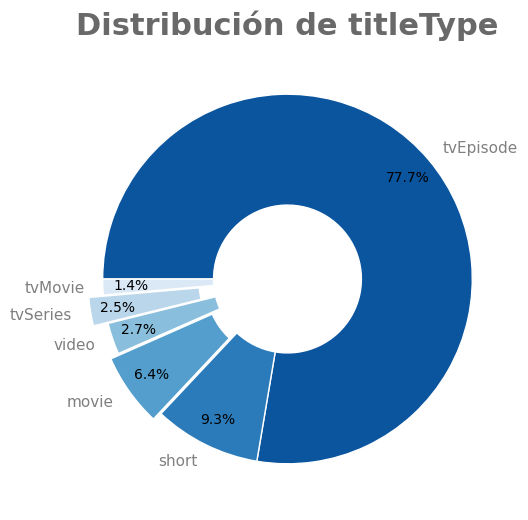

In [8]:
# Calcular el porcentaje de proportion para cada marca
df_titleType_frec['Porcentaje'] = df_titleType_frec['proportion'] / df_titleType_frec['proportion'].sum() * 100

greater = df_titleType_frec[df_titleType_frec['Porcentaje'] >= 0.9].copy()
greater = greater.sort_values(by='proportion', ascending=False)
colors = sns.color_palette('Blues_r', len(greater))
label_props = {'fontsize': 10, 'color': 'gray'}

fig, axs = plt.subplots(figsize=(10, 6),facecolor='none')
axs.set_facecolor('none')
axs.set_aspect('equal')
explode = [0,0,0.05,0,.08,0]
wedges, texts, autotexts = axs.pie(
    greater['proportion'],
    autopct='%1.1f%%',
    labels=greater['titleType'],
    textprops=label_props,
    pctdistance=0.85,
    startangle=180,
    wedgeprops=dict(width=0.6, edgecolor='w'),
    colors=colors,
    explode=explode,
    counterclock=False
)

# porcentajes:
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    # autotext.set_fontweight('bold')

# Etiquetas:
for text in texts:
    text.set_color('gray')
    text.set_fontsize(11)
    # text.set_fontweight('bold')

title = 'Distribución de titleType'
axs.set_title(title, fontsize=22, color='dimgray', fontweight='bold', pad=10)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_frec_titleType.png', dpi=300, transparent=True)
plt.show()


## Seleccionar tvSeries y movie.Convertir df a pandas.dataframe:


In [9]:
# seleccionar reducir el tamaño del df_title_basic selecioanando de la col titleType solamente 'movie' y 'tvSeries'
df_title_basics = df_title_basics[df_title_basics.titleType.isin(['movie', 'tvSeries'])] #titleType
df_title_basics.shape[0].compute()

948347

In [10]:
# convertir df_title_basics a pandas DataFrame
df_title_basics_pandas_movie_tvSeries = df_title_basics.compute()
df_title_basics_pandas_movie_tvSeries.shape

(948347, 9)

In [11]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear endYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894      \N   

  runtimeMinutes   genres  
8             45  Romance

## Eliminar duplicates and NaN:

In [12]:
# Eliminar todas las duplicados y NaN:
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates()
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.dropna(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries.shape #(493133, 7)

(948345, 9)

## Eliminar valores \N:

In [13]:
# Eliminar las filas del df_title_basics_pandas_movie_tvSeries cuyas filas de runtimeMinutes tienen \N
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.runtimeMinutes != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.startYear != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.genres != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.tconst != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.primaryTitle != '\\N']
df_title_basics_pandas_movie_tvSeries.shape

(493133, 9)

## Seleccionar filas convenientes:
* se eliminan ['primaryTitle','endYear']

In [14]:
# Descartar las columns=['primaryTitle','endYear']:
columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[columns]
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894   

  runtimeMinutes   genres  
8             45  Romance

In [15]:
df=df_title_basics_pandas_movie_tvSeries.copy()
df['titles_match'] = df['primaryTitle'] == df['originalTitle']
different_titles = df[df['titles_match'] == False]
print('DF con tvSeries y Movie completo',len(df))
print('DF con different_titles',len(different_titles))
different_titles

DF con tvSeries y Movie completo 493133
DF con different_titles 81509


In [ ]:
# greader_primaryTitle_20 = df['primaryTitle'].value_counts()>20

title_counts = df['primaryTitle'].value_counts()
repeated_primaryTitle= title_counts[title_counts > 20]
title_counts = df['originalTitle'].value_counts()
repeated_originalTitle = title_counts[title_counts > 20]
print('primaryTitle', repeated_primaryTitle[0:10])
print('repeated_originalTitle', repeated_originalTitle[0:10])


In [ ]:
different_titles.head()

## Reducir memoria:

### Convertir la columna titleType a int8
* **movie=1**
* **tvSeries=0**

In [ ]:
# Mapeo:
# mapping = {'movie': 1, 'tvSeries': 0}

# Aplicamos el mapeo a la columna 'titleType' y convertimos a int8
# df_title_basics_pandas_movie_tvSeries['titleType'] = df_title_basics_pandas_movie_tvSeries['titleType'].map(mapping).astype('int8')
# df_title_basics_pandas_movie_tvSeries.info()


In [ ]:
df_title_basics_pandas_movie_tvSeries.titleType.unique()

In [ ]:
# converitr a typo int las columnas: isAdult('int8'),
df_title_basics_pandas_movie_tvSeries['isAdult'] = df_title_basics_pandas_movie_tvSeries['isAdult'].astype('int8')
df_title_basics_pandas_movie_tvSeries['runtimeMinutes'] = df_title_basics_pandas_movie_tvSeries['runtimeMinutes'].astype('int32')
df_title_basics_pandas_movie_tvSeries['startYear'] = df_title_basics_pandas_movie_tvSeries['startYear'].astype('int16')

In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

In [ ]:
# originalTitle
# df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
len(df_title_basics_pandas_movie_tvSeries.originalTitle.unique())


## Elimino duplicates de originalTitle:

In [ ]:
# df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['originalTitle'])
# df_title_basics_pandas_movie_tvSeries.shape

In [ ]:
duplicate_titles = df_title_basics_pandas_movie_tvSeries['originalTitle'].value_counts()
duplicates = duplicate_titles[duplicate_titles > 1]
print('Duplicados en originaTitle =',len(duplicates))


In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

## Guardar el df de title_basic:
**df_title_basics_pandas_movie_tvSeries.csv**

---



In [ ]:
# /content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis
df_title_basics_pandas_movie_tvSeries.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv', index=False)


### Abrir

In [3]:
df_title_basics_pandas_movie_tvSeries=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')

In [ ]:
df_title_basics_pandas_movie_tvSeries.head(2)

In [ ]:
origianlTitle_duplicates=df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
origianlTitle_duplicates_up = origianlTitle_duplicates[origianlTitle_duplicates>10]
origianlTitle_duplicates_up.head(10)

In [ ]:
df_title_basics_pandas_movie_tvSeries_fil =df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle=='Love']
print(len(df_title_basics_pandas_movie_tvSeries_fil))
df_title_basics_pandas_movie_tvSeries_fil


# SEGUNDA DDBB: df_title_rating

In [ ]:
df_title_ratings.head(1)

In [13]:
df_title_ratings.shape[0].compute()

1446041


## Elimnar duplicates y NaN:

In [14]:
# Eliminar todas las duplicados y NaN:
df_title_ratings = df_title_ratings.drop_duplicates()
df_title_ratings = df_title_ratings.drop_duplicates(subset=['tconst'], keep='first')
df_title_ratings = df_title_ratings.dropna(subset=['tconst'])
df_title_ratings.shape[0].compute()

1446041

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [15]:
### Filtrar  y pasar el df a pandas ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Definir una función para filtrar cada partición de df_title_ratings
def filter_partitions(partition, tconst_basics_set):
    return partition[partition['tconst'].isin(tconst_basics_set)]

# Aplicar la función de filtro a cada partición del DataFrame de Dask
filtered_df_title_ratings = df_title_ratings.map_partitions(filter_partitions, tconst_basics_set)
filtered_df_title_ratings = filtered_df_title_ratings.compute() # convertir a DataFrame de Pandas
filtered_df_title_ratings.head()

tconst  averageRating  numVotes
8    tt0000009          5.400       212
144  tt0000147          5.200       516
372  tt0000574          6.000       907
381  tt0000591          5.400        24
434  tt0000679          5.300        74

## Reduce memory:

In [16]:
filtered_df_title_ratings.averageRating=filtered_df_title_ratings.averageRating.astype('float16')
filtered_df_title_ratings.numVotes=filtered_df_title_ratings.numVotes.astype('int32')
filtered_df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325912 entries, 8 to 1446036
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         325912 non-null  string 
 1   averageRating  325912 non-null  float16
 2   numVotes       325912 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 8.5 MB


## DDBB completa sin filtrar lo codigos tt que corresponden a tvSeries y movie:

In [17]:
df_title_ratings_pandas = df_title_ratings.compute() # convertir a DataFrame de Pandas
df_title_ratings_pandas.averageRating=df_title_ratings_pandas.averageRating.astype('float16')
df_title_ratings_pandas.numVotes=df_title_ratings_pandas.numVotes.astype('int32')
df_title_ratings_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float16
 2   numVotes       1446041 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 26.5 MB


In [18]:
df_title_ratings_pandas_movie_tvSeries = filtered_df_title_ratings.copy()

## Guardar el df de title_rating:
**fitrada**:
* **df_title_ratings_pandas_movie_tvSeries.csv**

**Con todas las columnas**:
* **df_title_ratings_pandas.csv**

---



In [19]:
# DDBB filtrada
filtered_df_title_ratings.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas_movie_tvSeries.csv', index=False)
# DDBB con todos los titleType
df_title_ratings_pandas.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas.csv', index=False)

In [20]:
df_title_ratings_pandas.shape

(1446041, 3)

## Merge entre:
* df_title_basics_pandas_movie_tvSeries
* df_title_ratings_pandas

**Merged:**
* **df_basic_rating.csv**

In [21]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating = pd.merge(df_title_basics_pandas_movie_tvSeries, df_title_ratings_pandas, on='tconst', how='inner')
df_merged_basic_rating.shape

(325912, 10)

In [22]:
df=df_merged_basic_rating.copy()
df_fil = df[df.originalTitle=='Love']
print(len(df_fil))
df_fil.head()

17


tconst titleType primaryTitle originalTitle  isAdult  startYear  \
2846    tt0018107     movie         Love          Love        0       1927   
47360   tt0084271     movie         Love          Love        0       1982   
125378  tt0384293     movie         Love          Love        0       2003   
126708  tt0392360     movie         Love          Love        0       1991   
134713  tt0450363     movie         Love          Love        0       2005   

        runtimeMinutes                 genres  averageRating  numVotes  
2846                82          Drama,Romance          6.801      1185  
47360              105                  Drama          5.500        42  
125378             104                  Drama          6.000        43  
126708             152  Drama,Musical,Romance          6.000      1646  
134713              90         Drama,Thriller          5.699       421

## Guardar Merge:
* **df_basic_rating.csv**

In [23]:
df_merged_basic_rating.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv', index=False)

In [ ]:
df_merged_basic_rating =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Tercer DDBB: df_title_rating

## Tratar la columnas 'budget' and 'revenue': eliminar los valores menores a 0.

In [59]:
# Elimina los registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero.
df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
# df_tmdb.shape[0].compute()

###Pasar a pandas dataframe:

In [4]:
df_tmdb= df_tmdb.compute()
df_tmdb.shape

## Tratar columnas:
* Cambio el nombre de la columna id= 'imbd'a 'tconst'
* Selecciono columnas convenientes.
* Creo la columna roi.

In [5]:
# reducir el df a las col:'imdb_id', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average', 'roi':
df_tmdb['tconst']=df_tmdb['imdb_id'] ## unidicacion de codigos de las fuentes de DDBB de TMDB Y IMDB
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
df_tmdb_all = df_tmdb.copy()
columns_0= ['tconst', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average','roi']
df_tmdb = df_tmdb[columns_0]
columns_1= ['tconst', 'original_title','vote_average', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'original_language',  'overview',
       'popularity', 'poster_path', 'genres', 'production_companies', 'production_countries', 'roi']
df_tmdb_all = df_tmdb_all[columns_1]
# Crear la col roi:
print('df_tmdb: ', df_tmdb.shape)
print('df_tmdb_all: ', df_tmdb_all.shape)

In [ ]:
df_tmdb_all.columns


## Elimnar duplicates y NaN:

In [ ]:
def clean_dataframe(df, subset_column):
    # df = df.drop_duplicates()
    df = df.drop_duplicates(subset=[subset_column])
    df = df.dropna(subset=[subset_column])
    # df = df.dropna()
    return df

df_tmdb = clean_dataframe(df_tmdb, 'tconst')
df_tmdb_all = clean_dataframe(df_tmdb_all, 'tconst')

print('df_tmdb: ', df_tmdb.shape)
print('df_tmdb_all: ', df_tmdb_all.shape)

In [ ]:
df_tmdb_all.info()

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [ ]:
### Filtrar  ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Filtrar df_tmdb para incluir solo las filas cuyo 'tconst' esté en tconst_basics_set
filterd_df_tmdb = df_tmdb[df_tmdb['tconst'].isin(tconst_basics_set)]
filtered_df_tmdb_all = df_tmdb_all[df_tmdb_all['tconst'].isin(tconst_basics_set)]

print('filtered_df_tmdb:', filterd_df_tmdb.shape)
print('~'*70)
print('filtered_df_tmdb_all:', filtered_df_tmdb_all.shape)

In [ ]:
filterd_df_tmdb = filterd_df_tmdb.dropna()
filterd_df_tmdb.info()

In [ ]:
filtered_df_tmdb_all.dropna(inplace=True)
filtered_df_tmdb_all.info()

## Limpiar duplicados y NaN:

In [ ]:
#eliminar duplicates y nan:
filtered_df_tmdb = filtered_df_tmdb.drop_duplicates()
filtered_df_tmdb = filtered_df_tmdb.dropna()
filtered_df_tmdb.info()

## Tratar columna roi:

In [ ]:
# ver outliers de col roi:
filtered_df_tmdb = filtered_df_tmdb.reset_index(drop=True)
sns.boxplot(x=filtered_df_tmdb['roi'])

In [ ]:
roi_descriptive_stats = filtered_df_tmdb['roi'].describe()
print(roi_descriptive_stats)

In [ ]:
# LIMITAR EL roi: mínimo=-1 y maximo 10:
filtered_df_tmdb = filtered_df_tmdb[(filtered_df_tmdb['roi'] >= -1) & (filtered_df_tmdb['roi'] <= 10)]
filtered_df_tmdb.roi.describe()

In [ ]:
filtered_df_tmdb.info()

## Reduce memory:

In [ ]:
filtered_df_tmdb.vote_average = filtered_df_tmdb.vote_average.astype('float16')
filtered_df_tmdb.roi = filtered_df_tmdb.roi.astype('float16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget_mll'].astype('uint16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue_mll'].astype('uint8')
filtered_df_tmdb['roi'] = filtered_df_tmdb['roi'].astype('float16')

# eliminar revenue and budget:
# filtered_df_tmdb = filtered_df_tmdb.drop(['revenue', 'budget'], axis=1)
filtered_df_tmdb.info()

## PAsar a type datetime la col: release_date:

In [ ]:
# convertir la col release_date a datetime:
filtered_df_tmdb['release_date'] = pd.to_datetime(filtered_df_tmdb['release_date'])
filtered_df_tmdb.info()

In [ ]:
df_tmdb_pandas = filtered_df_tmdb.copy()

## Guardar df de tmdb:
* **df_tmdb_pandas.csv**

In [ ]:
# Guardar en drive:
filtered_df_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv', index=False)

## Merge entre:
* df_merged_basic_rating
* df_tmdb_pandas

In [ ]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating_tmdb = pd.merge(df_merged_basic_rating, df_tmdb_pandas, on='tconst', how='inner')
df_merged_basic_rating_tmdb.shape

In [ ]:
# Guardar en drive:
df_merged_basic_rating_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv', index=False)

In [ ]:
# abrir de driva:
df_merged_basic_rating_tmdb=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

# Mostrar INFO de las tres DDBB:

In [2]:
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
df_title_ratings_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas_movie_tvSeries.csv')
df_title_ratings_pandas = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas.csv')
df_tmdb_pandas = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv')

print('df_title_basics_pandas_movie_tvSeries')
print('Columns:', df_title_basics_pandas_movie_tvSeries.columns)
print('-'*40)
print(df_title_basics_pandas_movie_tvSeries.info())
print('-'*70)
print('df_title_ratings_pandas_movie_tvSeries')
print('Columns:', df_title_ratings_pandas_movie_tvSeries.columns)
print('-'*40)
print(df_title_ratings_pandas_movie_tvSeries.info())
print('-'*70)
print('df_title_ratings_pandas')
print('Columns:', df_title_ratings_pandas.columns)
print('-'*40)
print(df_title_ratings_pandas.info())
print('-'*70)
print('df_tmdb_pandas')
print('Columns:', df_tmdb_pandas.columns)
print('-'*40)
print(df_tmdb_pandas.info())

df_title_basics_pandas_movie_tvSeries
Columns: Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493133 entries, 0 to 493132
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          493133 non-null  object
 1   titleType       493133 non-null  object
 2   primaryTitle    493133 non-null  object
 3   originalTitle   493133 non-null  object
 4   isAdult         493133 non-null  int64 
 5   startYear       493133 non-null  int64 
 6   runtimeMinutes  493133 non-null  int64 
 7   genres          493133 non-null  object
dtypes: int64(3), object(5)
memory usage: 30.1+ MB
None
----------------------------------------------------------------------
df_title_ratings_pandas_movie_tvSeries
Columns: Index(['tconst', 'averageRating'

In [26]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle  isAdult  startYear  \
0  tt0000009     movie   Miss Jerry    Miss Jerry        0       1894   

   runtimeMinutes   genres  
0              45  Romance

In [29]:
df_title_ratings_pandas_movie_tvSeries.head(1)

tconst  averageRating  numVotes
0  tt0000009          5.400       212

In [28]:
df_tmdb_pandas.head(1)

tconst release_date     budget    revenue  \
0  tt1375666   2010-07-15  160000000  825532764   

                               genres  \
0  Action, Science Fiction, Adventure   

                       production_countries  vote_average   roi     profit  \
0  United Kingdom, United States of America         8.370 4.160  665532764   

                        poster_path  adult  revenue_mll  budget_mll  
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg  False           57         160

##**2.3 Análisis Exploratorio (EDA)**

In [21]:
df_merged_basic_rating_tmdb =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

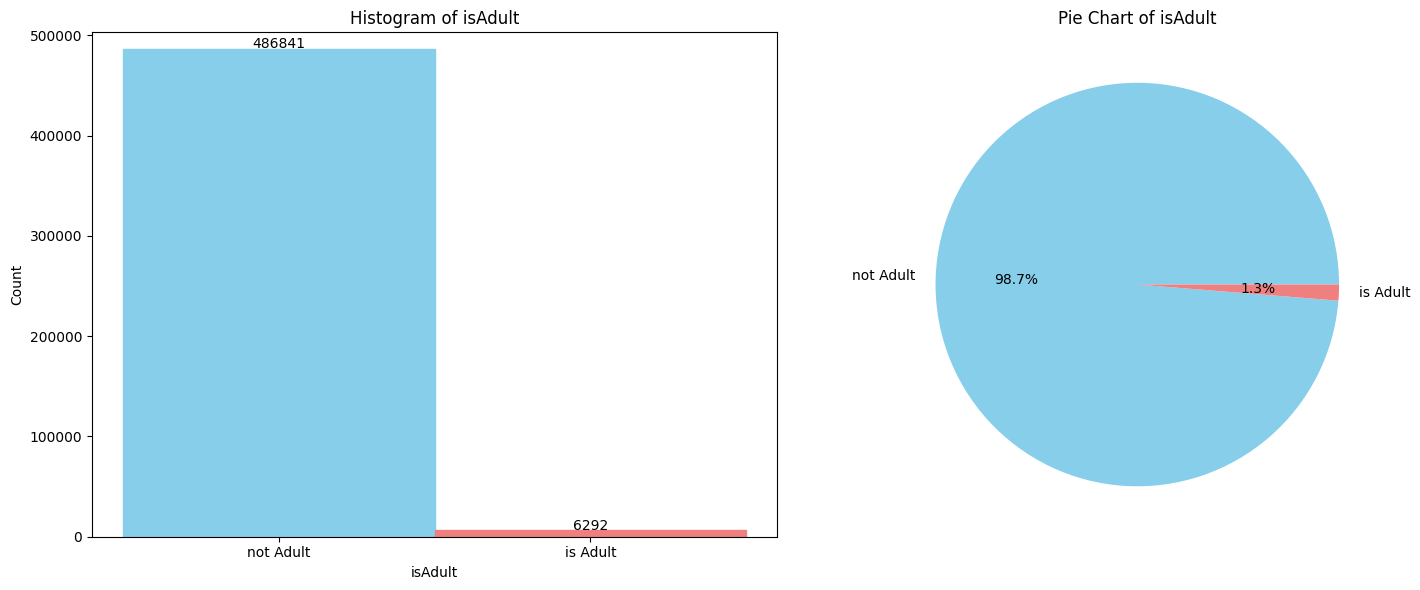

In [28]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var= 'isAdult'
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var], bins=2, kde=False, ax=axs[0], color=colors[0])
axs[0].set_title(f'Histogram of {var}')
axs[0].set_ylim(0, df[var].count() + 10000)
axs[0].set_xticks([0.25, 0.75])
axs[0].set_xticklabels(['not Adult', 'is Adult'])
bars = ax.patches
for i, bar in enumerate(bars):
    bar.set_color(colors[i])
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + 500, '{:1.0f}'.format(height), ha="center")
df_counts = df[var].value_counts()
axs[1].pie(df_counts, labels=['not Adult', 'is Adult'], autopct='%1.1f%%', colors=colors)
axs[1].set_title(f'Pie Chart of {var}')
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

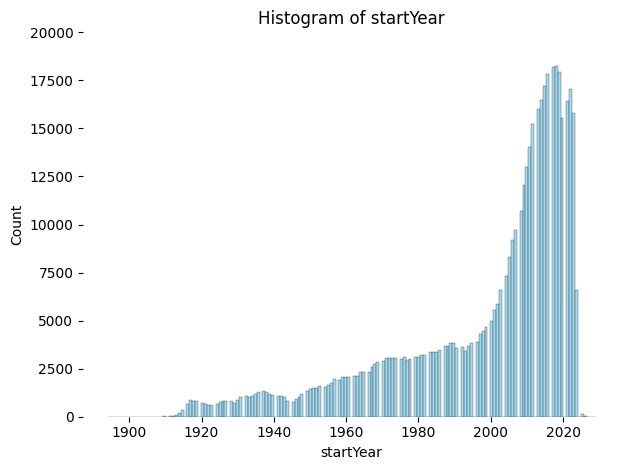

In [46]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var=  'startYear'#'runtimeMinutes',
ax = plt.plot(figsize=(16, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var], kde=False, color=colors[0])
ax.set_title(f'Histogram of {var}')
ax.set_ylim(0, 2e4)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

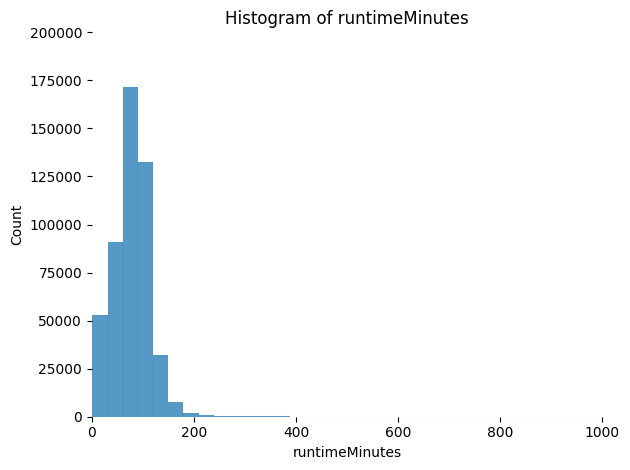

In [15]:
# Histograma
df = df = df_title_basics_pandas_movie_tvSeries
var=  'runtimeMinutes'
ax = plt.plot(figsize=(16, 6))
colors = ['skyblue', 'lightcoral']
ax = sns.histplot(df[var],bins=2000)
ax.set_title(f'Histogram of {var}')
ax.set_ylim(0, 200000)
ax.set_xlim(0, 1000)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

## **Graficar histograma para Basic**
* **df_title_basics_pandas_movie_tvSeries:**

---



## **Graficar histograma para Rating:**

* **df_title_ratings_pandas_movie_tvSeries:**
---

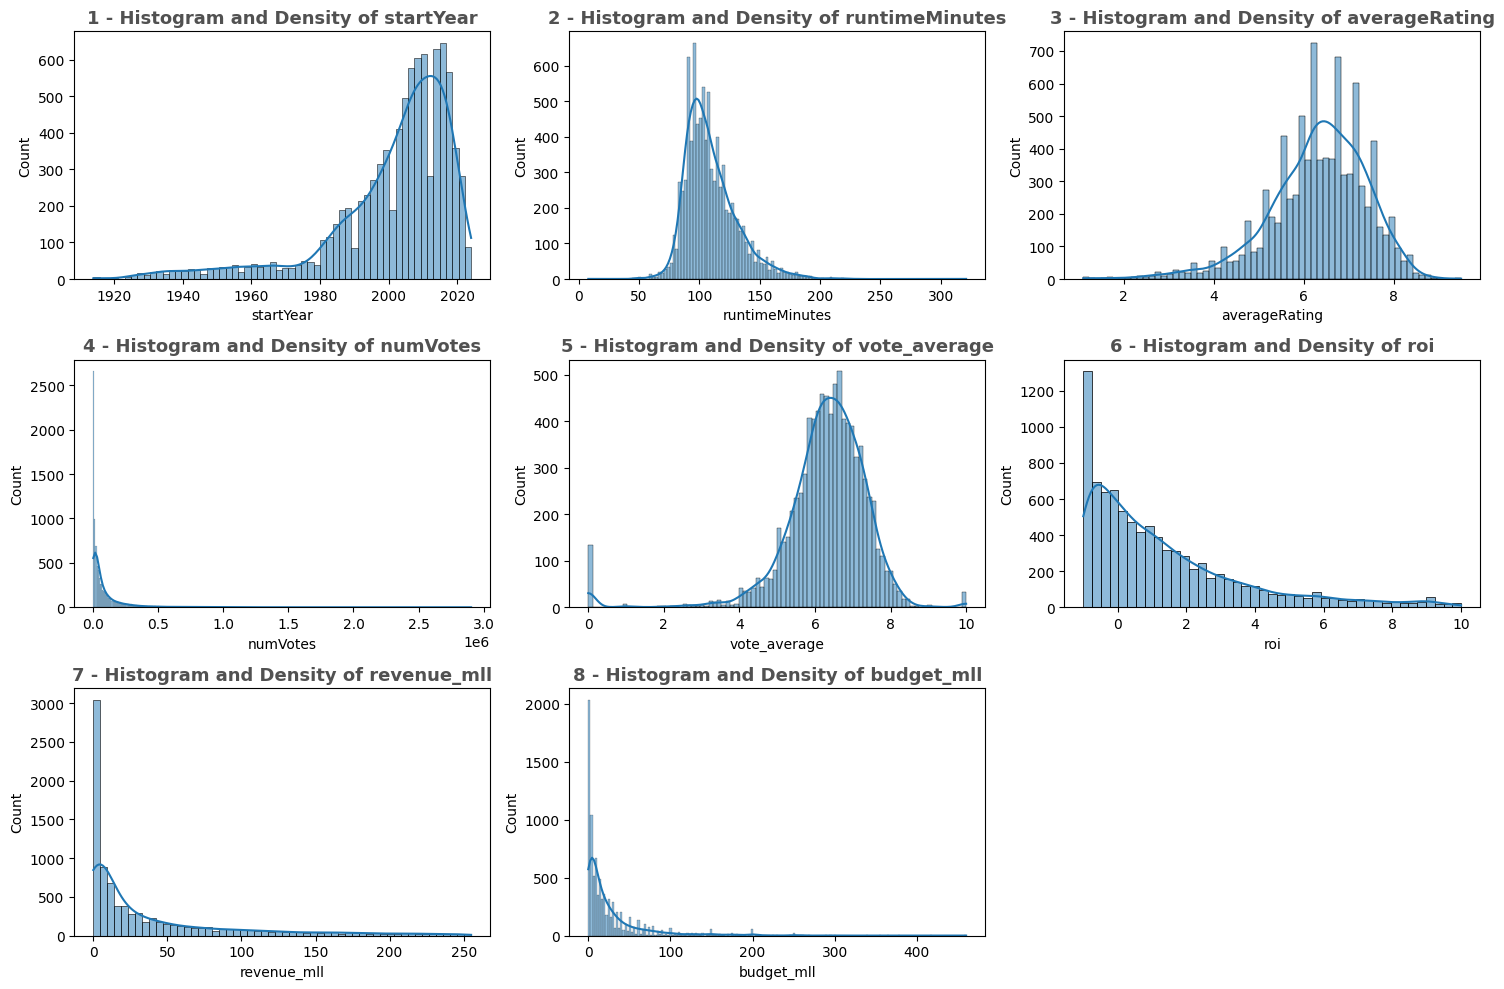

In [75]:
# df_merged_basic_rating_tmdb =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
plt.figure(figsize=(15, 10),facecolor='none')
numeric_cols = ['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'vote_average', 'roi', 'revenue_mll', 'budget_mll']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_merged_basic_rating_tmdb[col], kde=True)
    plt.title(f'{i+1} - Histogram and Density of {col}', color='#515151',fontweight='bold',fontsize=13)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/histogramas_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


##Histograms:
1.   **startYear:**  La distribución de startYear nos muestra la concentración de valores entre los años 2000 y 2020. Crece de forma exponencial hasta 2010 aprox. y luego disminución en los años posteriores.

2.   **rumTimeMinutes:** La distribución de rumTimeMinutes nos muestra una notable concentración alrededor de 100 minutos.

3.   **averageRating:** La distribución de averageRating nos muestra una concentración en 6.5 aprox. presentando gran simetría.

4.   **numVotes:** La distribución de numVotes nos muestra una concentración en 0 aproximadamente. presentando gran asimetría con decaimiento exponencial.

5.   **vote_average:** La distribución de vote_average nos muestra una concentración en 7 aprox. presentando gran simetría.

6.   **roi:**  La distribución de roi nos muestra una concentración en 0 aproximadamente. presentando asimetría con decaimiento exponencial.

7.   **revenue_mll:**  La distribución de revenue_mll nos muestra una concentración en 0 aproximadamente. presentando gran asimetría con decaimiento exponencial.

8.   **budget_mll:**  La distribución de budget_mll nos muestra una concentración en 0 aproximadamente. presentando gran asimetría con decaimiento exponencial.



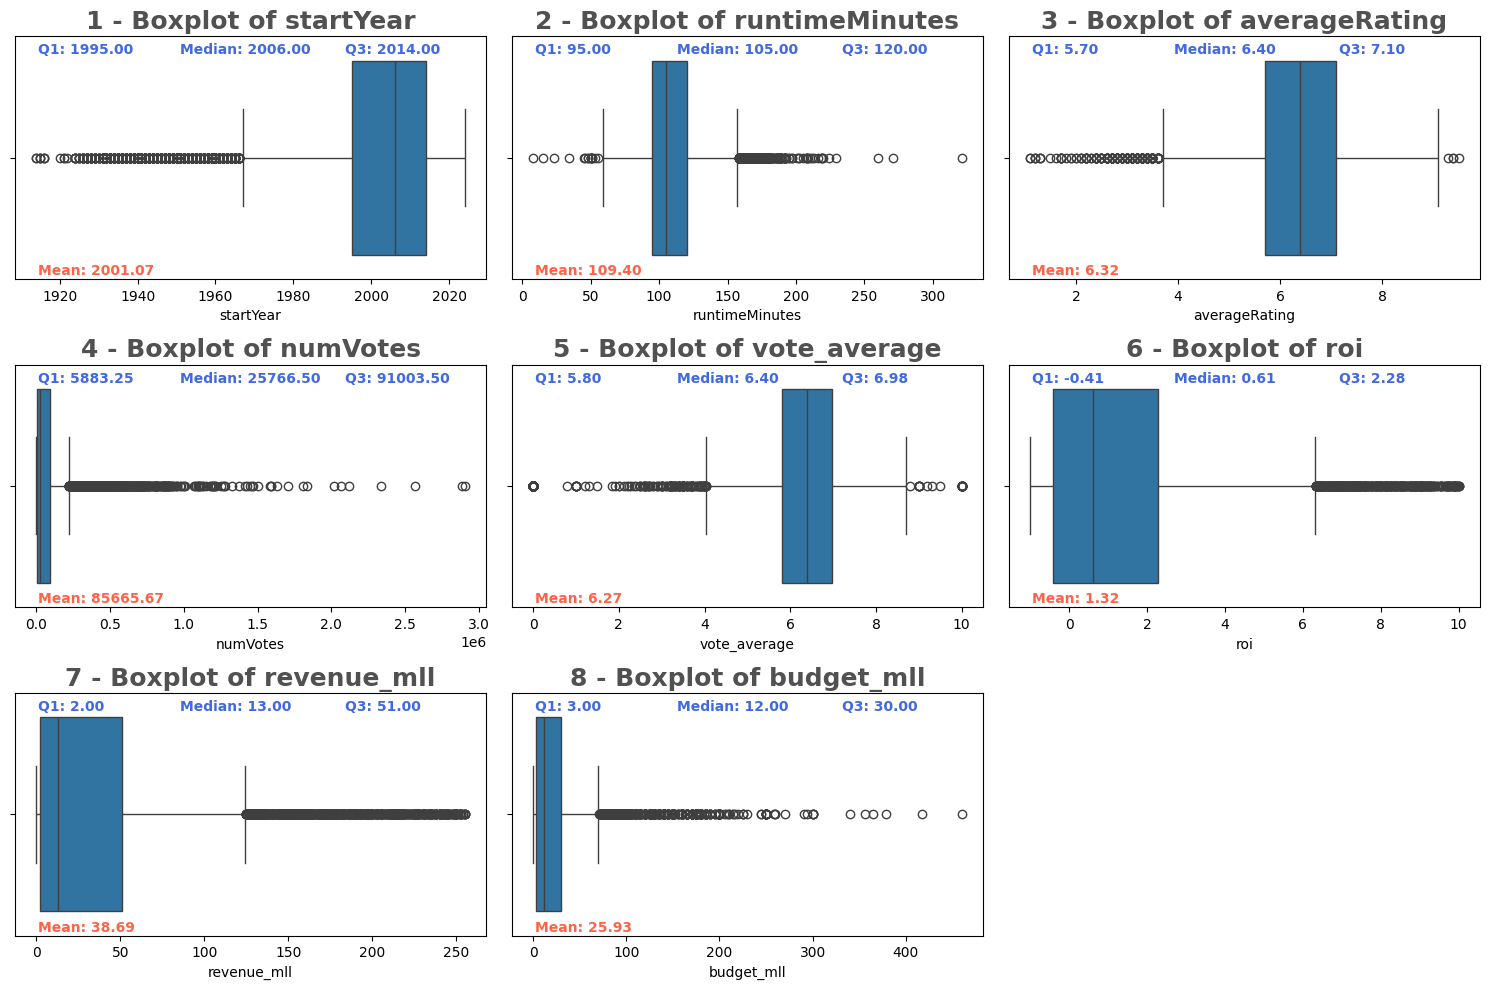

In [72]:
df_merged_basic_rating_tmdb =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
numeric_cols = ['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'vote_average', 'roi', 'revenue_mll', 'budget_mll']

plt.figure(figsize=(15, 10), facecolor='none')

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_merged_basic_rating_tmdb[col])
    plt.title(f'{i+1} - Boxplot of {col}', color='#515151',fontweight='bold',fontsize=18)

    q1 = df_merged_basic_rating_tmdb[col].quantile(0.25)
    median = df_merged_basic_rating_tmdb[col].median()
    mean = df_merged_basic_rating_tmdb[col].mean()
    q3 = df_merged_basic_rating_tmdb[col].quantile(0.75)

    plt.text(0.05, 0.93, f'Q1: {q1:.2f}', transform=plt.gca().transAxes, color='royalblue',fontweight='bold')
    plt.text(.35, 0.93, f'Median: {median:.2f}', transform=plt.gca().transAxes, color='royalblue',fontweight='bold')
    plt.text(.7, 0.93, f'Q3: {q3:.2f}', transform=plt.gca().transAxes, color='royalblue',fontweight='bold')
    plt.text(.05, 0.02, f'Mean: {mean:.2f}', transform=plt.gca().transAxes, color='tomato',fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/boxplots_analysis.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

##Boxplots:
1.   **startYear:**  La distribución de startYear nos muestra la concentración de valores entre los años 1995 y 2014 con una mediana en 2006, lo cual sugiere una disminución en los anos posteriores. los outliers estan por debajo del bigote inferior 1965 aprox. presenta una distribución asimétrica demostrada por la diferencia entre mean y median.

2.   **rumTimeMinutes:** La distribución de rumTimeMinutes nos muestra la concentración de valores entre los minutos 95 y 120 con una mediana en 105. los outliers estan por debajo y por arriba de los bigotes, pero con mayor tendencia sobre el superior. presenta una distribución levemente asimétrica demostrada por la pequeña diferencia entre mean y median.

3.   **averageRating:** La distribución de averageRating nos muestra la concentración de valores entre 5.7 y 7.1 con una mediana en 6.4. los outliers estan por debajo y por arriba de los bigotes, pero con mayor tendencia sobre el inferior. presenta una distribución casi simétrica demostrada por la pequeña diferencia entre mean=6.32 y median=6.4.

5.   **vote_average:** La distribución de vote_average nos muestra la concentración de valores entre 5.8 y 6.98 con una mediana en 6.40. los outliers estan por debajo y por arriba de los bigotes, pero con mayor tendencia sobre el inferior. presenta una distribución casi simétrica demostrada por la pequeña diferencia entre mean=6.27 y median=6.40.

6.   **roi:**  La distribución de roi nos muestra la concentración de valores entre -0.41 y 2.28 con una mediana en 0.61. los outliers estan por arriba del bigote superor (6 en adelante aprox.). presenta una distribución asimétrica demostrada por la diferencia entre mean=1.32 y median=0.61.

7.   **revenue_mll:**  La distribución de revenue_mll nos muestra la concentración de valores entre los $2mll y $51mll con una mediana en $13mll. los outliers estan por arriba del bigote superor (125 en adelante aprox.). presenta una distribución asimétrica demostrada por la diferencia entre mean=38.7 y median=13.

8.   **budget_mll:**  La distribución de budget_mll nos muestra la concentración de valores entre los $3 mll y $30 mll con una mediana en $12 mll. los outliers estan por arriba del bigote superor (125 en adelante aprox.). presenta una distribución asimétrica demostrada por la diferencia entre mean=25.9 y median=12.



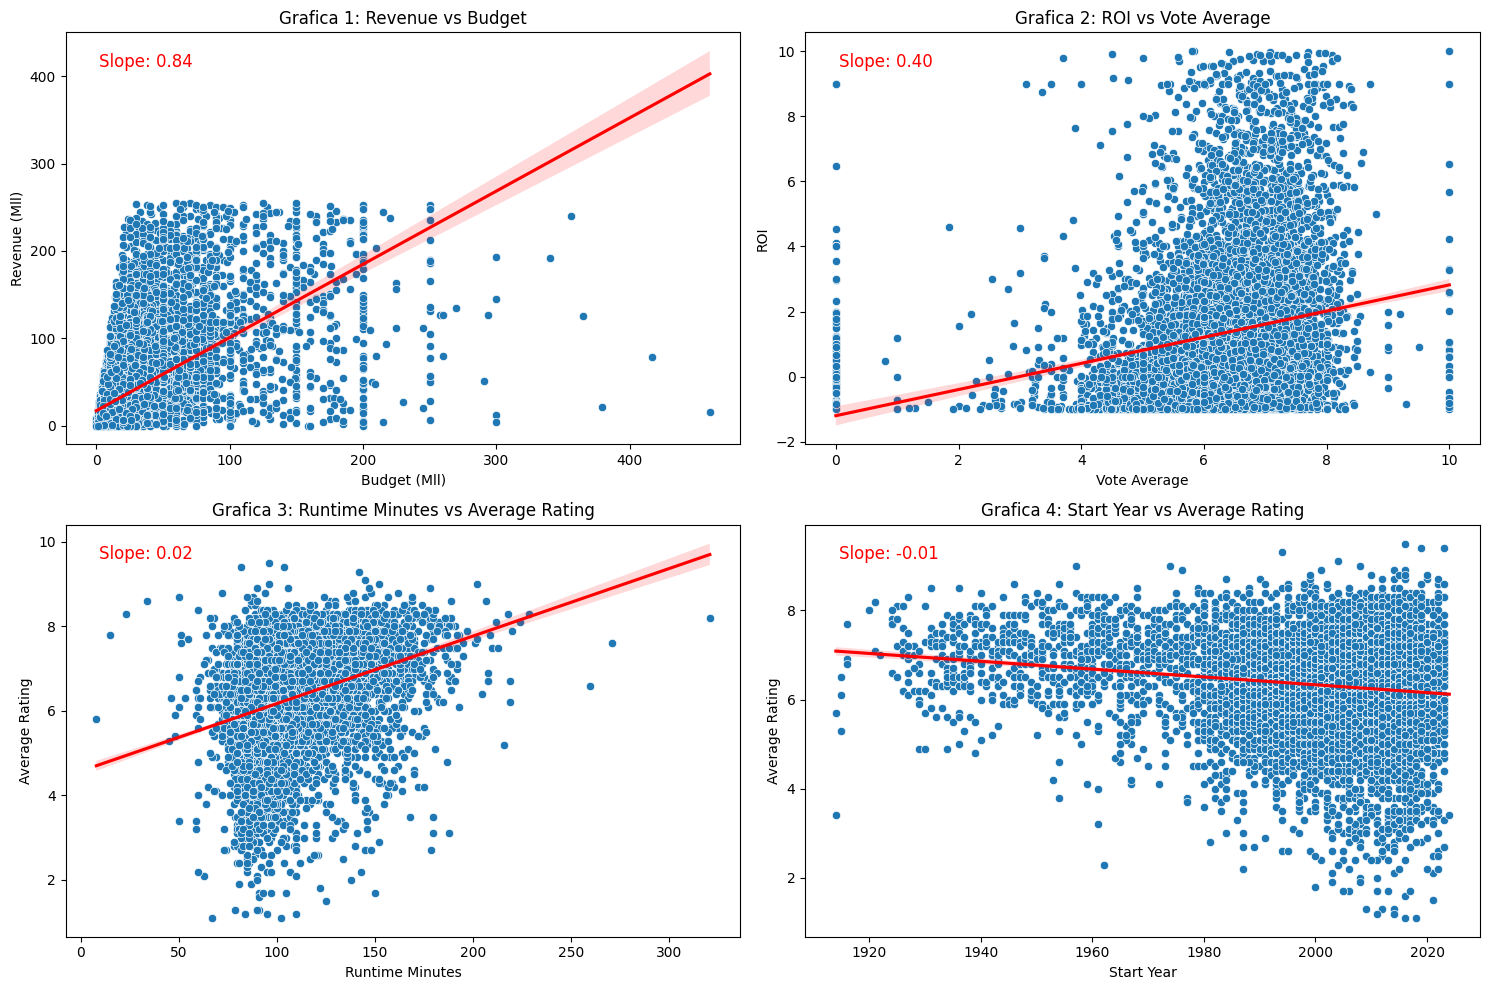

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_with_slope(x, y, data, xlabel, ylabel, title, ax): # Función para calcular y mostrar la pendiente
    sns.scatterplot(x=x, y=y, data=data, ax=ax)
    sns.regplot(x=x, y=y, data=data, scatter=False, color='red', ax=ax)

    X = data[x].values.reshape(-1, 1)
    Y = data[y].values
    reg = LinearRegression().fit(X, Y)
    slope = reg.coef_[0]

    ax.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plt.figure(figsize=(15, 10), facecolor='none')

ax1 = plt.subplot(2, 2, 1)
plot_with_slope('budget_mll', 'revenue_mll', df_merged_basic_rating_tmdb, 'Budget (Mll)', 'Revenue (Mll)', 'Grafica 1: Revenue vs Budget', ax1)

ax2 = plt.subplot(2, 2, 2)
plot_with_slope('vote_average', 'roi', df_merged_basic_rating_tmdb, 'Vote Average', 'ROI', 'Grafica 2: ROI vs Vote Average', ax2)

ax3 = plt.subplot(2, 2, 3)
plot_with_slope('runtimeMinutes', 'averageRating', df_merged_basic_rating_tmdb, 'Runtime Minutes', 'Average Rating', 'Grafica 3: Runtime Minutes vs Average Rating', ax3)

ax4 = plt.subplot(2, 2, 4)
plot_with_slope('startYear', 'averageRating', df_merged_basic_rating_tmdb, 'Start Year', 'Average Rating', 'Grafica 4: Start Year vs Average Rating', ax4)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/scatterplots_analysis.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


##Gráficas:

1. **Grafica 1: Revenue vs Budget**
  la relación entre budget y revenue muestra una linea de tendencia positiva con una pendiente 0.84. lo que sugiere gran proporcionalidad entre ambas variables.

2. **Grafica 2: roi vs Vote Average**
  la relación entre roi y vote average muestra una linea de tendencia positiva con una pendiente 0.40. lo que sugiere que al aumentar el promedio de los votos aumenta levemente el roi.

3. **Grafica 3: Runtime Minutes vs Average Rating**
  la relación entre Runtime Minutes vs Average Rating muestra una linea de tendencia con una pendiente próxima a 0 (slope=0.02). lo que sugiere que las variables tienen una relación positiva pero muy pequeña.

4. **Grafica 4: Start Year vs Average Rating**
  la relación entre Start Year y Average Rating muestra una linea de tendencia con una pendiente próxima a 0 (slope=-0.01). lo que sugiere que las variables tienen una relación negativa pero muy pequeña.

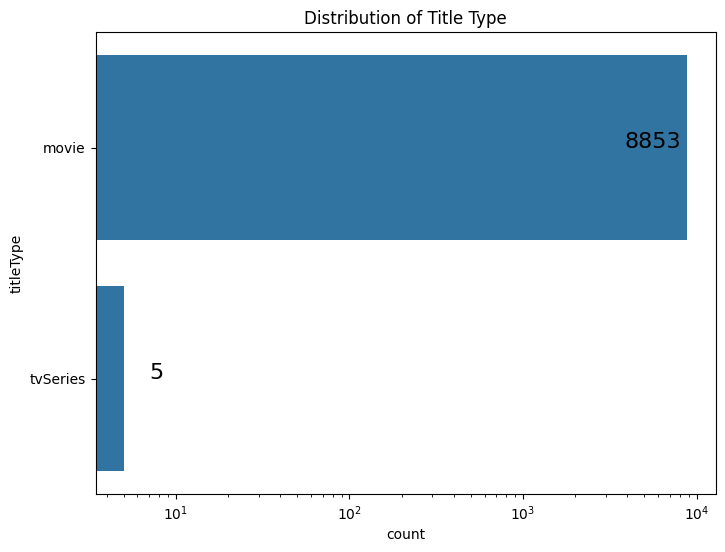

In [32]:
plt.figure(figsize=(8, 6),facecolor='none')

sns.countplot(y='titleType', data=df_merged_basic_rating_tmdb, order=df_merged_basic_rating_tmdb['titleType'].value_counts().index)
plt.title('Distribution of Title Type')

title_counts = df_merged_basic_rating_tmdb['titleType'].value_counts()
for i, (title_type, count) in enumerate(title_counts.items()):
  if i == 0:
    plt.text(count - 5e3, i, f'{str(count)}',fontsize=16)
  else:
    plt.text(count +2, i, str(count),fontsize=16)

plt.xscale('log')
title_types = ['movie','tvSeries']
plt.yticks(ticks=range(len(title_counts)), labels=title_types)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/countplot_analysis.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

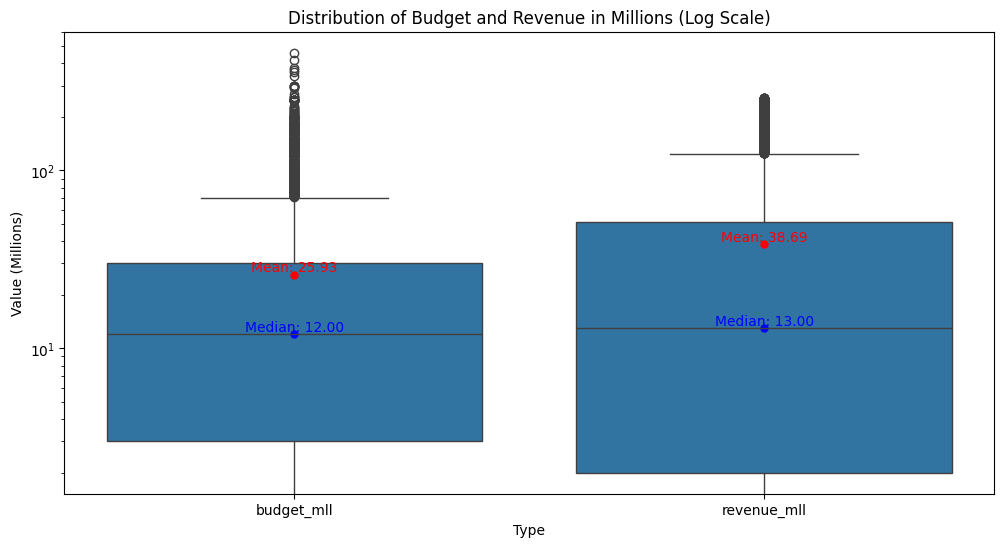

In [33]:
budget_revenue_df = df_merged_basic_rating_tmdb[['budget_mll', 'revenue_mll']].melt(var_name='Type', value_name='Value')

plt.figure(figsize=(12, 6), facecolor='none')
sns.boxplot(x='Type', y='Value', data=budget_revenue_df)
plt.yscale('log')
plt.title('Distribution of Budget and Revenue in Millions (Log Scale)')
plt.xlabel('Type')
plt.ylabel('Value (Millions)')

# Calcular y añadir la media y la mediana
for type_ in budget_revenue_df['Type'].unique():
    subset = budget_revenue_df[budget_revenue_df['Type'] == type_]
    mean = subset['Value'].mean()
    median = subset['Value'].median()

    # Añadir la media
    plt.plot([type_], [mean], marker='o', markersize=5, color='red')
    plt.text(x=type_, y=mean, s=f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')

    # Añadir la mediana
    plt.plot([type_], [median], marker='o', markersize=5, color='blue')
    plt.text(x=type_, y=median, s=f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/boxplot_analysis_budget_revenue.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


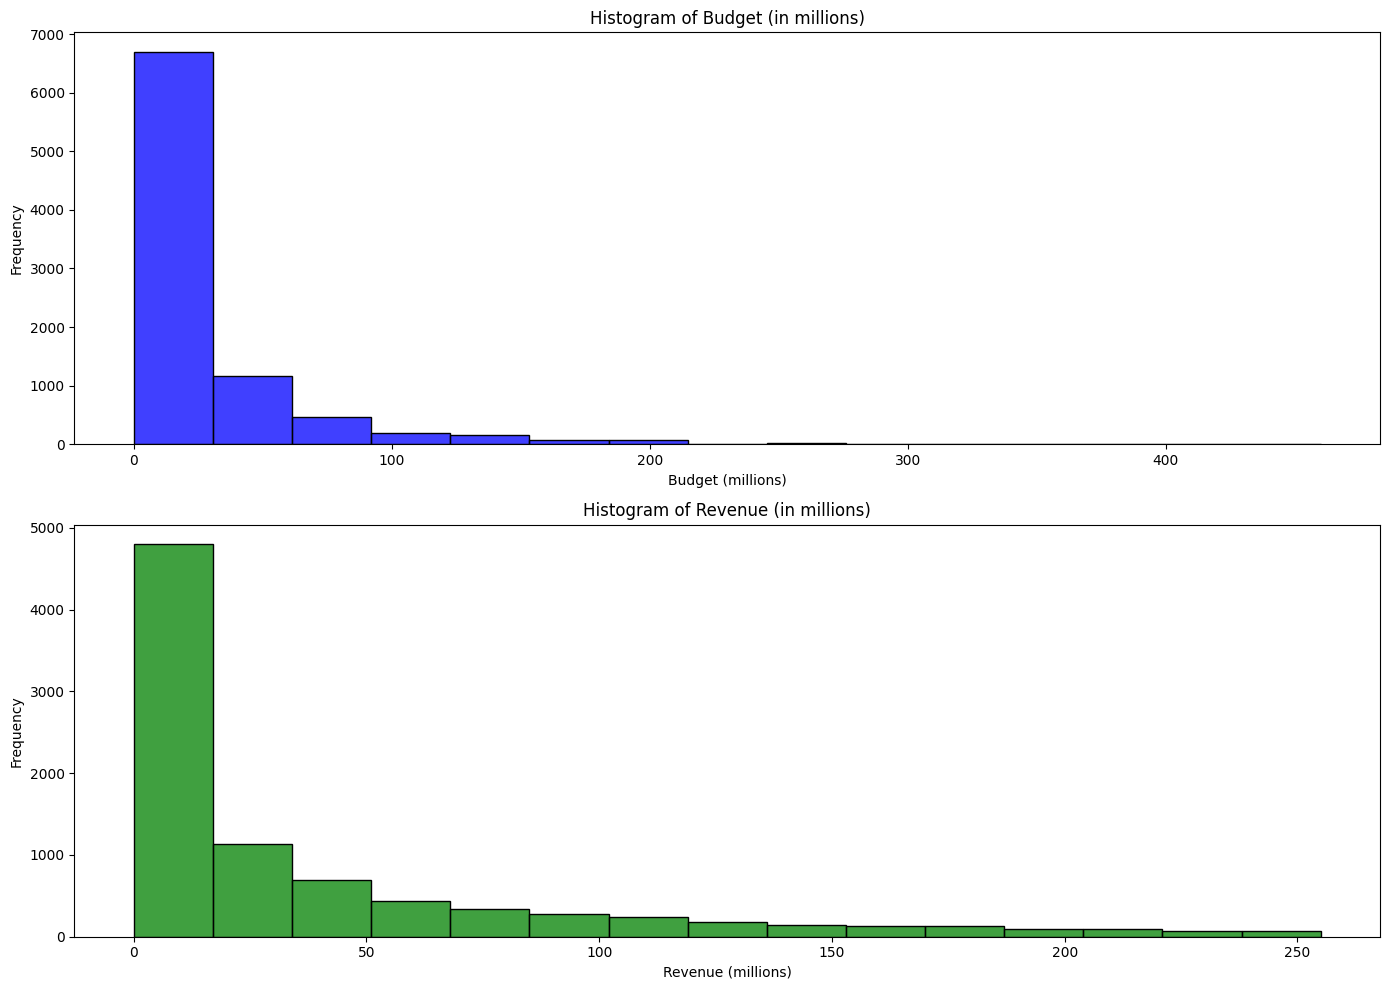

In [35]:
# Histograma
fig, axs = plt.subplots(2, figsize=(14, 10),facecolor='none')
sns.histplot(df_merged_basic_rating_tmdb['budget_mll'], bins=15, kde=False, ax=axs[0], color='blue')
axs[0].set_title('Histogram of Budget (in millions)')
axs[0].set_xlabel('Budget (millions)')
axs[0].set_ylabel('Frequency')

sns.histplot(df_merged_basic_rating_tmdb['revenue_mll'], bins=15, kde=False, ax=axs[1], color='green')
axs[1].set_title('Histogram of Revenue (in millions)')
axs[1].set_xlabel('Revenue (millions)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/histogram_analysis_budget_revenue.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


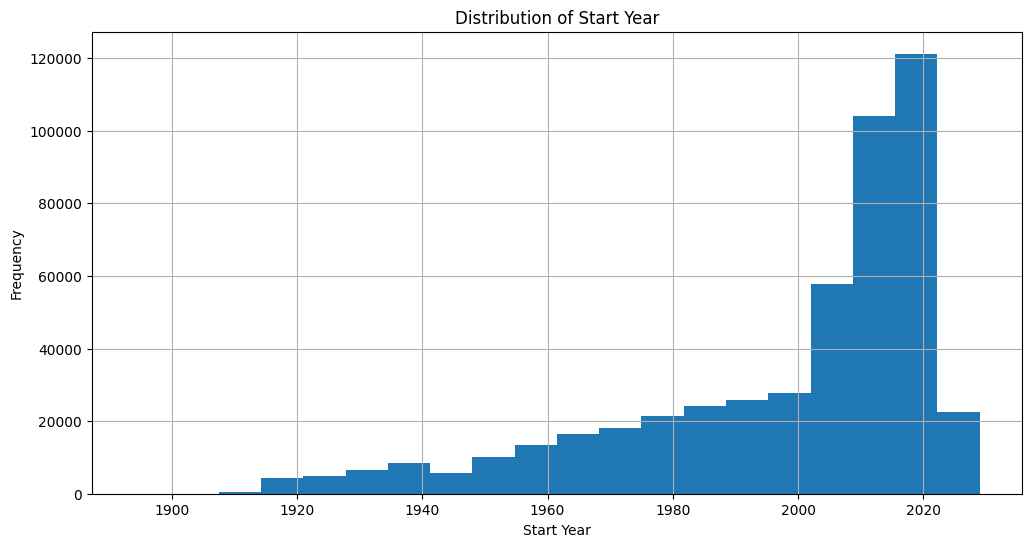

In [39]:
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
df_title_basics_pandas_movie_tvSeries.head()
df=df_title_basics_pandas_movie_tvSeries.copy()
plt.figure(figsize=(12, 6),facecolor='none')
df['startYear'].hist(bins=20)
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Distribution of Start Year')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/histograma_startYear.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

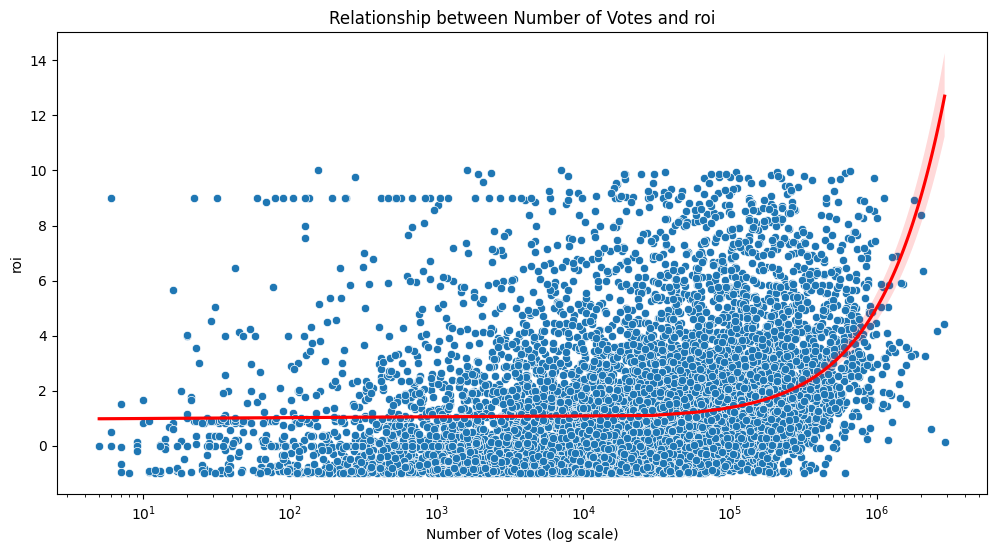

In [40]:
plt.figure(figsize=(12, 6),facecolor='none')
sns.scatterplot(x='numVotes', y='roi', data=df_merged_basic_rating_tmdb)
sns.regplot(x='numVotes', y='roi', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.xscale('log')  # Escala logarítmica en el eje x para mejor visualización
plt.title('Relationship between Number of Votes and roi')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('roi')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/scatterplot_numVotes_roi.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

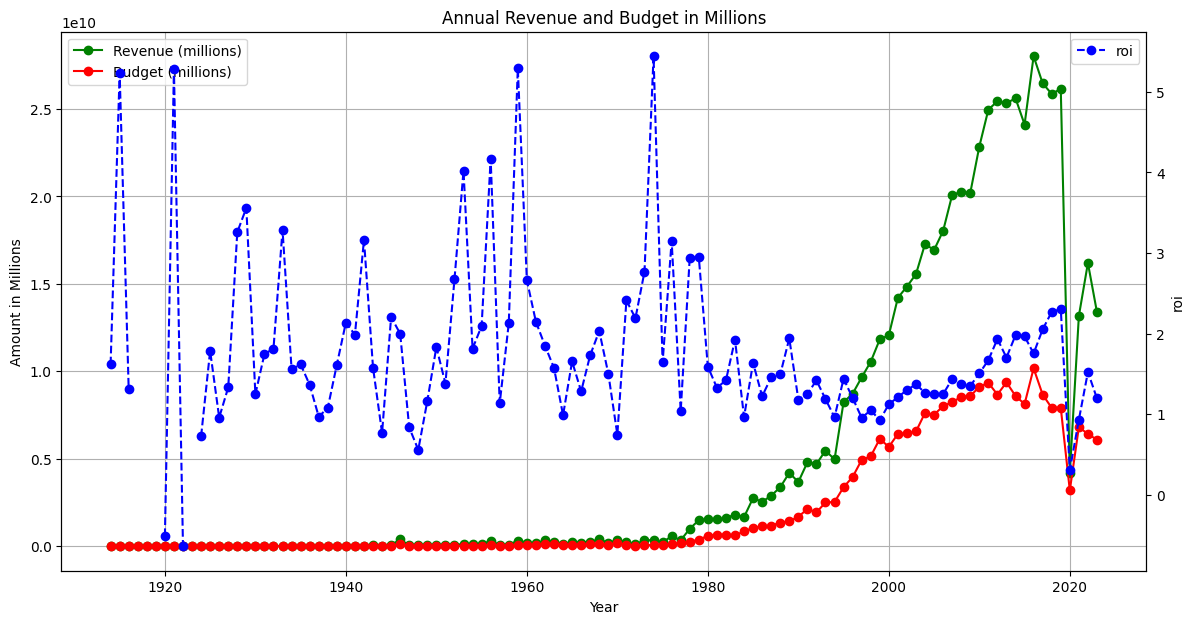

In [48]:
# Graficar la serie temporal de 'revenue_mll' y 'budget_mll' por año
df_merged_basic_rating_tmdb_date = df_merged_basic_rating_tmdb.copy()

df_merged_basic_rating_tmdb_date['release_date'] = pd.to_datetime(df_merged_basic_rating_tmdb_date['release_date'])
df_merged_basic_rating_tmdb_date.set_index('release_date', inplace=True)
annual_revenue = df_merged_basic_rating_tmdb_date.resample('Y').sum()['revenue']
annual_budget = df_merged_basic_rating_tmdb_date.resample('Y').sum()['budget']

annual_roi = (annual_revenue - annual_budget) / annual_budget

fig, ax1 = plt.subplots(figsize=(14, 7),facecolor='none')
ax1.plot(annual_revenue.index.year, annual_revenue, marker='o', color='green', label='Revenue (millions)')
ax1.plot(annual_budget.index.year, annual_budget, marker='o', color='red', linestyle='-', label='Budget (millions)')
ax1.set_title('Annual Revenue and Budget in Millions')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in Millions')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(annual_roi.index.year, annual_roi, marker='o', color='blue', linestyle='--', label='roi')
ax2.set_ylabel('roi')
ax2.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/lineplot_revenue_budget_roi.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [ ]:
#@title
df_merged_basic_rating_tmdb.head()

In [43]:
df_merged_basic_rating.head()

tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000147     movie   The Corbett-Fitzsimmons Fight   
2  tt0000574     movie     The Story of the Kelly Gang   
3  tt0000591     movie                The Prodigal Son   
4  tt0000679     movie  The Fairylogue and Radio-Plays   

                    originalTitle  isAdult  startYear  runtimeMinutes  \
0                      Miss Jerry        0       1894              45   
1   The Corbett-Fitzsimmons Fight        0       1897             100   
2     The Story of the Kelly Gang        0       1906              70   
3               L'enfant prodigue        0       1907              90   
4  The Fairylogue and Radio-Plays        0       1908             120   

                       genres  averageRating  numVotes  
0                     Romance          5.400       212  
1      Documentary,News,Sport          5.200       516  
2  Action,Adventure,Biography          6.000       907  
3                       Drama          5.400        24  
4           Adventure,Fantasy          5.300        74

In [ ]:
df_merged_basic_rating.shape

In [80]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')
avg_rating_by_year_type = df_merged_basic_rating.groupby(['startYear', 'titleType'])['averageRating'].mean().reset_index()
# Establecer rango de años desde 1990 a 2025 en la col startYear:
avg_rating_by_year_type_lim = avg_rating_by_year_type[(avg_rating_by_year_type['startYear'] >= 1990) & (avg_rating_by_year_type['startYear'] <= 2025)]

avg_rating_by_year_type_lim.head(5)

startYear titleType  averageRating
142       1990     movie          5.965
143       1990  tvSeries          7.017
144       1991     movie          6.047
145       1991  tvSeries          6.957
146       1992     movie          6.058

In [12]:
df_merged_basic_rating.titleType.value_counts(normalize=True)

titleType
movie      0.843
tvSeries   0.157
Name: proportion, dtype: float64

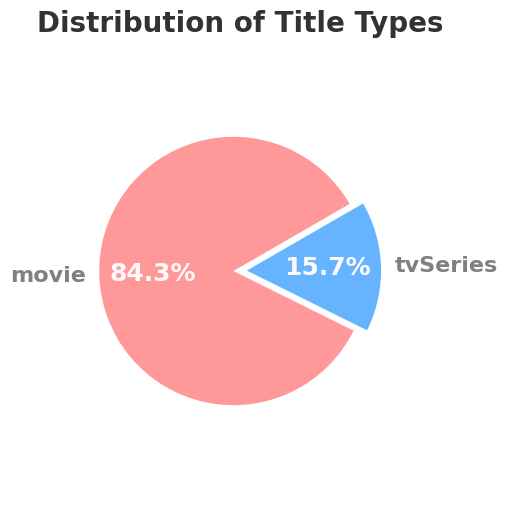

In [81]:
# Graf Pai:
title_counts = df_merged_basic_rating['titleType'].value_counts()

plt.figure(figsize=(4, 6),facecolor='none')
explode = (0.1, 0)
colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=30, colors=colors, explode=explode)

for text in texts:
    text.set_color('gray')
    text.set_fontweight('bold')
    text.set_fontsize(16)

for autotext in autotexts:
    autotext.set_color('snow')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(18)

plt.title('Distribution of Title Types', fontsize=20, color='#323232', fontweight='bold')
plt.axis('equal')
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/pie_analysis_types.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()


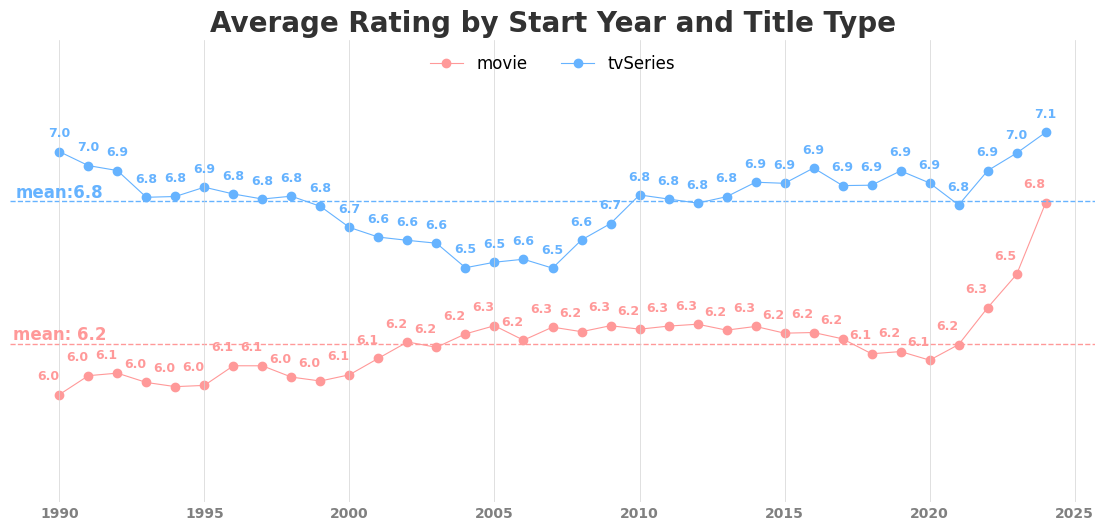

In [92]:
df=avg_rating_by_year_type_lim.copy()
df_type_movie = df[df['titleType'] == 'movie']
df_type_tvSeries = df[df['titleType'] == 'tvSeries']

avg_rating_movie = df_type_movie['averageRating'].mean()
avg_rating_tvSeries = df_type_tvSeries['averageRating'].mean()

plt.figure(figsize=(14, 6),facecolor='none')
plt.plot(df_type_movie['startYear'], df_type_movie['averageRating'], marker='o', linestyle='-', color='#ff9999', label='movie',linewidth=.8)
plt.axhline(y=avg_rating_movie, color='#ff9999', linestyle='--', linewidth=1)
plt.text(1990,avg_rating_movie, f'mean: {avg_rating_movie:.1f}', ha='center', va='bottom', color='#ff9999', fontsize=12, fontweight='bold')

for x, y in zip(df_type_movie['startYear'], df_type_movie['averageRating']):
    plt.text(x, y+.05, f'{y:.1f}', ha='right', va='bottom', color='#ff9999', fontsize=9, fontweight='bold')

plt.plot(df_type_tvSeries['startYear'], df_type_tvSeries['averageRating'], marker='o', linestyle='-', color='#66b3ff', label='tvSeries', linewidth=.8)
plt.axhline(y=avg_rating_tvSeries, color='#66b3ff', linestyle='--', linewidth=1)
plt.text(1990,avg_rating_tvSeries, f'mean:{avg_rating_tvSeries:.1f}', ha='center', va='bottom', color='#66b3ff', fontsize=12, fontweight='bold')

for x, y in zip(df_type_tvSeries['startYear'], df_type_tvSeries['averageRating']):
    plt.text(x, y+.05, f'{y:.1f}', ha='center', va='bottom', color='#66b3ff', fontsize=9, fontweight='bold')

plt.title('Average Rating by Start Year and Title Type',fontsize=20,color='#323232',fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.xticks(range(1990, 2026, 5), color='gray', fontweight='bold')
plt.yticks([])
plt.ylim(5.5, 7.5)
plt.legend(frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1),fontsize=12)

for year in range(1990, 2026, 5):
    plt.axvline(x=year, color='lightgrey', linestyle='-', linewidth=0.5)

plt.box(False)
plt.tick_params(axis='both', length=0)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_analysis/lineplot_analysis_rating_series_movies.png', dpi=300, bbox_inches='tight', transparent=True )
plt.show()

##Análisis de gráficas:
1. En la gráfica tipo pai observamos históricamente una gran preferencia del público hacia las movies en relación a las tv series.
2. Por otra parte en la gráfica de líneas observamos que historicamente tienen un mayor rating las tv series respecto de las movies. Con un promedio histórico de 6.8 para las tv series y 6.2 para las movies.

##**Pregunta 2: ¿Cual es el rating promedio por género?**

In [65]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 2: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'), movie_count=('tconst', 'count')).reset_index()

df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)
df_genre_stats

genre  avg_rating  movie_count
0         Drama       6.328       144290
1        Comedy       6.083        87220
2   Documentary       7.235        51286
3       Romance       6.195        35925
4        Action       5.882        33098
5         Crime       6.144        29823
6      Thriller       5.649        25607
7     Adventure       6.139        22384
8        Horror       5.016        22201
9        Family       6.433        16183
10      Mystery       6.021        13880
11    Animation       6.689        11481
12      Fantasy       6.065        10548
13    Biography       6.978         9943
14      History       6.896         9839
15        Music       6.759         8956
16       Sci-Fi       5.521         7989
17          War       6.468         6396
18      Musical       6.215         6366
19      Western       5.957         5404
20   Reality-TV       6.280         4925
21        Sport       6.721         4649
22        Adult       5.496         3848
23    Talk-Show       6.162         2546
24    Game-Show       6.192         2234
25         News       6.526         1709
26    Film-Noir       6.463          873
27        Short       7.102          558

<ipython-input-111-6d31e2b35caf>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genre_stats, x='genre', y='movie_count', palette='dark:salmon_r', ax=ax1)
<ipython-input-111-6d31e2b35caf>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


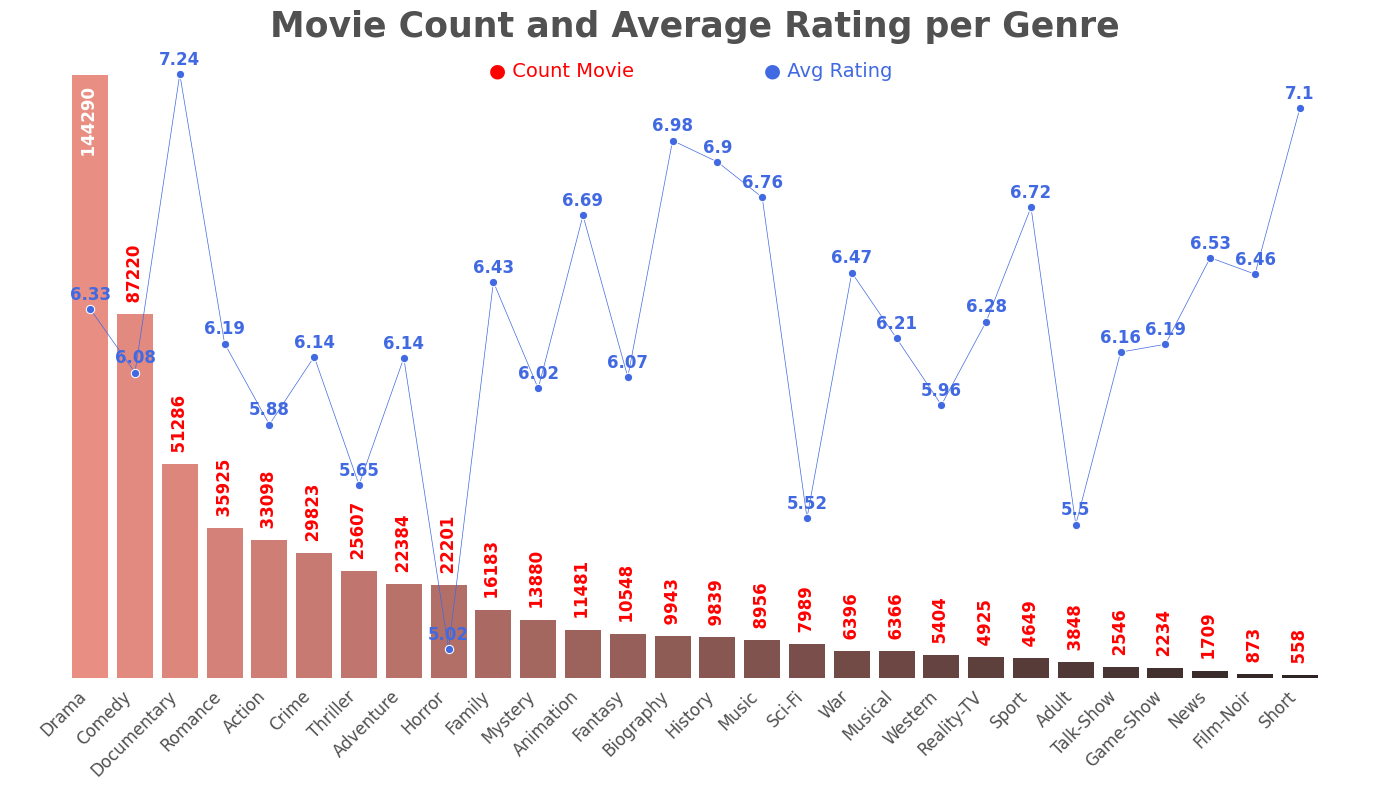

In [111]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')


df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()

# Ordenar por 'movie_count' en orden descendente
df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

fig, ax1 = plt.subplots(figsize=(14, 8), facecolor='none')

sns.barplot(data=df_genre_stats, x='genre', y='movie_count', palette='dark:salmon_r', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelcolor='#515151', rotation=45, width=0,labelsize=12)
# ax1.tick_params(axis='y', labelcolor='r', fontweight='bold', labelsize=12
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.yaxis.set_visible(False)
ax1.annotate('● Count Movie', xy=(0.35, 0.95), xycoords='axes fraction', fontsize=14, color='red', ha='left')
ax1.annotate('● Avg Rating', xy=(0.55, 0.95), xycoords='axes fraction', fontsize=14, color='royalblue', ha='left')

# Agregar valores al final de las barras
for i, v in enumerate(df_genre_stats['movie_count']):
    ax1.text(i, v + 1, f'  {str(v)}  ', ha='center', va='top' if v>1e5 else 'bottom', color='r' if v<1e5 else 'w',fontweight='bold',rotation=90,fontsize=12)

# Crear un segundo eje y
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', color='royalblue', marker='o', ax=ax2, linestyle='-', linewidth=0.5)
ax2.set_ylabel('')
# ax2.tick_params(axis='y', labelcolor='b', length=0)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.yaxis.set_visible(False)

# Agregar valores al final de las líneas
for i, v in enumerate(df_genre_stats['avg_rating']):
    ax2.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom', color='royalblue',fontweight='bold',fontsize=12)


ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
# ax1.gca().spines['bottom'].set_visible(False)
plt.tick_params(axis='both', length=0)

plt.title('Movie Count and Average Rating per Genre',fontsize=25,color='#515151',fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_count_avg_rating_per_genre.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


##Análisis de gráficas:
1. En la gráfica de barras observamos la prevalencia de las movies type of Drama con una cantidad que supera en un 40% a inmediata pertenenciente al type of Comedy, y esta supera en un 41% a la tercera del type of Documentary.
2. Por otra parte en la gráfica de líneas observamos que las dos primeras de tipo Drama y Comedy tiene un buen average rating, con 6.33 y 6.08 respectivamente, pero Documentary está en el Top con 7.24 , luego le sigue Short con 7.1 (pero se encuentra al final de la consideración por cantidad), y en trercer lugar se ubica el tipo Biografy con 6.98 (pero también con bajo conteo)

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor roi?**

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv')
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
# Merge por la col tconst:
df_tmdb_merged_basic = df.merge(df_title_basics_pandas_movie_tvSeries, on='tconst')

df_tmdb_expanded = df_tmdb_merged_basic.assign(genre=df_tmdb_merged_basic['genres_x'].str.split(',').explode('genre').str.strip()).explode('genre')
df_genre_roi = df_tmdb_expanded.groupby('genre').agg({'roi': 'mean','revenue_mll':'sum','budget_mll':'sum'}).sort_values(by='roi', ascending=False).head(10).reset_index()
df_genre_roi['profit']=df_genre_roi['revenue_mll']-df_genre_roi['budget_mll']
df_genre_roi.sort_values(by='roi', ascending=False, inplace=True)
df_genre_roi

genre   roi  revenue_mll  budget_mll  profit
0  Science Fiction 1.853        27784       17884    9900
1        Animation 1.625        13131        8000    5131
2        Adventure 1.576        41539       29152   12387
3          History 1.567         4851        2964    1887
4          Fantasy 1.537        22853       14628    8225
5           Action 1.508        49854       33379   16475
6           Family 1.333        17854       11915    5939
7          Mystery 1.325        10330        6075    4255
8            Drama 1.187        44566       28772   15794
9          Romance 1.170        13990        9046    4944

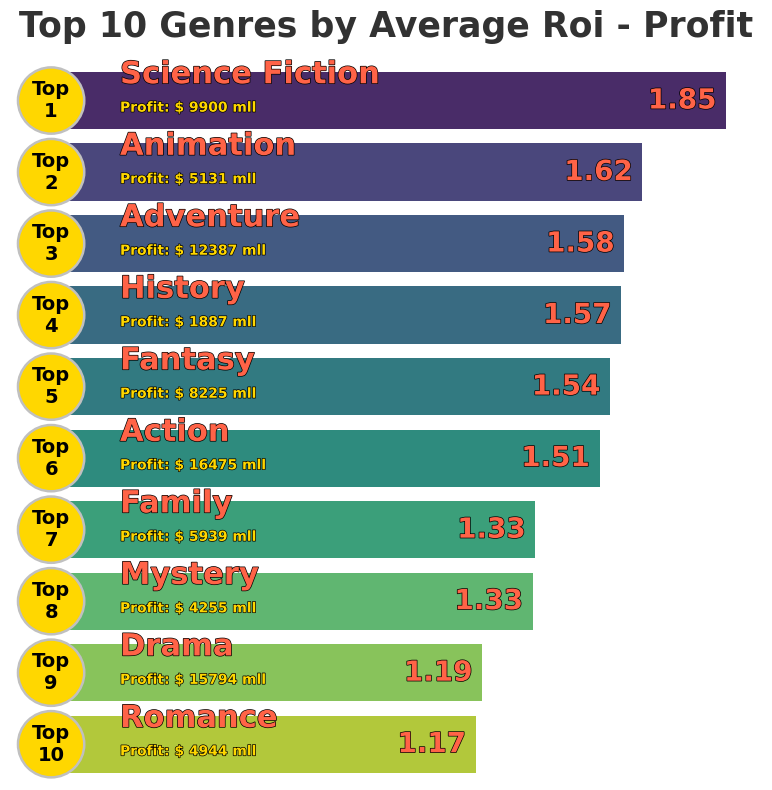

In [11]:
import matplotlib.patheffects as patheffects

plt.figure(figsize=(8, 8),facecolor='none')
ax=sns.barplot(data=df_genre_roi, x='roi', y='genre', palette='viridis', legend=False)
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Genres by Average Roi - Profit',fontsize=25,color='#323232',fontweight='bold',pad=20)

for i, v in enumerate(df_genre_roi['roi']):
    plt.text(v, i, f'{str(round(v, 2))} ', va='center', ha='right',fontsize=20,color='tomato',fontweight='bold', path_effects=[patheffects.withStroke(linewidth=1, foreground='black')])

for i, (gen, rev) in enumerate(zip(df_genre_roi['genre'], df_genre_roi['profit'])):
    plt.text(.2, i - .36, f'{gen}', va='center', ha='left', fontsize=22, color='tomato', fontweight='bold', path_effects=[patheffects.withStroke(linewidth=1, foreground='black')])
    plt.text(.2, i + .1, f'Profit: $ {rev} mll', va='center', ha='left', fontsize=10, color='gold', fontweight='bold', path_effects=[patheffects.withStroke(linewidth=1, foreground='black')])


for index, p in enumerate(ax.patches):
    ax.annotate(f'Top\n{index + 1}',
                xy=(.05, p.get_y() + p.get_height() / 2),
                xytext=(-10, 0),
                textcoords='offset points',
                ha='center', va='center',
                fontsize=14, color='black', fontweight='bold',
                bbox=dict(boxstyle="circle,pad=0.65", edgecolor='silver', facecolor='gold', lw=1.8))

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.box(on=False)
plt.grid(False)
plt.xlim(-.1, df_genre_roi['roi'].max() + .1)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/top_10_genres_roi.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

##Análisis de gráficas:
  En el análisis del roi promedio según el género, observamos como el tipo Sci Fi se ubica en el top, con 1.85 y una ganancia de 9.9 billones, seguido por Animation con 1.62 y una ganancia de 5.1 Billones. Y en el top 3 se ubica Adventure con 1.58 pero con una ganancia de 12.3 billones, superando ampliamente a las anteriores.

##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [58]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot

production_countries   roi  count  revenue_mll
15                    Sweden 0.577     85         1248
14               South Korea 1.666     93         3080
13                 Hong Kong 1.312    120         7110
12                   Belgium 0.138    140         2240
11                 Australia 0.925    166         7182
10                     China 1.342    171        11016
9                     Russia 0.584    206         1592
8                      Italy 0.384    211         4370
7                      Japan 1.166    218         9530
6                      Spain 0.713    219         4778
5                     Canada 0.875    437        19231
4                    Germany 0.679    494        22144
3                      India 1.781    602        10020
2                     France 0.706    753        21483
1             United Kingdom 1.120   1063        45614
0   United States of America 1.428   6355       311067

In [94]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot['percent_count'] = df_plot['count'] / df_plot['count'].sum()
df_plot

production_countries   roi  count  revenue_mll  percent_count
15                    Sweden 0.577     85         1248          0.008
14               South Korea 1.666     93         3080          0.008
13                 Hong Kong 1.312    120         7110          0.011
12                   Belgium 0.138    140         2240          0.012
11                 Australia 0.925    166         7182          0.015
10                     China 1.342    171        11016          0.015
9                     Russia 0.584    206         1592          0.018
8                      Italy 0.384    211         4370          0.019
7                      Japan 1.166    218         9530          0.019
6                      Spain 0.713    219         4778          0.019
5                     Canada 0.875    437        19231          0.039
4                    Germany 0.679    494        22144          0.044
3                      India 1.781    602        10020          0.053
2                     France 0.706    753        21483          0.066
1             United Kingdom 1.120   1063        45614          0.094
0   United States of America 1.428   6355       311067          0.561

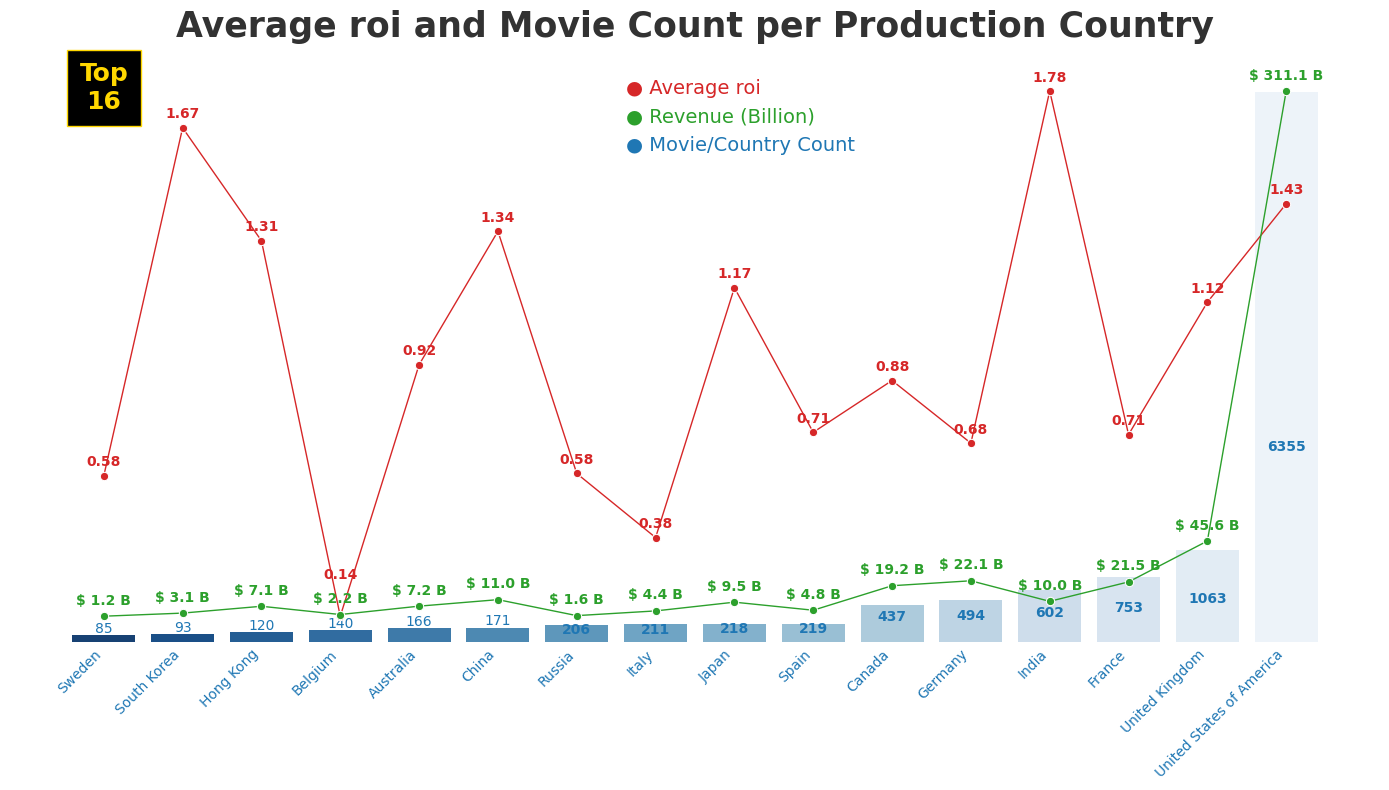

In [99]:
color_blue = 'tab:blue'
color_red = 'tab:red'
color_green = 'tab:green'

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='none')
sns.barplot(x='production_countries', y='count', data=df_plot, palette='Blues_r', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',color= color_blue)
ax1.tick_params(axis='y', left=False, labelleft=False)
ax1.tick_params(axis='x', bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')

for p in ax1.patches:
  if p.get_height() < 200:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-70),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 textcoords='offset points')
  if p.get_height() < 400:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-210),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')
  else:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()/3),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')

ax2 = ax1.twinx()
sns.lineplot(x='production_countries', y='roi', data=df_plot, color=color_red, marker='o', linewidth=1, ax=ax2)
ax2.tick_params(axis='y', right=False, labelright=False)
ax2.set_ylabel('')

for i, v in enumerate(df_plot['roi']):
    ax2.text(i, v + 0.02 if v > 0.15 else v + 0.15, f'{v:.2f}', ha='center', va='bottom' if v > 0.15 else 'top', color='tab:red',fontweight='bold')

ax3 = ax1.twinx()

ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje 60 puntos a la derecha
sns.lineplot(x='production_countries', y='revenue_mll', data=df_plot, color=color_green, marker='o', linewidth=1, ax=ax3)
ax3.tick_params(axis='y', right=False, labelright=False)
ax3.set_ylabel('')

for i, v in enumerate(df_plot['revenue_mll']):
    ax3.text(i, v + 5000, f'$ {v / 1e3:.1f} B', ha='center', va='bottom', color=color_green,fontweight='bold')

plt.title(f'Average roi and Movie Count per Production Country', fontsize=25, color='#323232',fontweight='bold',pad=20)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax1.tick_params(axis='both', length=0)
ax2.tick_params(axis='both', length=0)
ax3.tick_params(axis='both', length=0)

ax2.annotate('● Average roi', xy=(0.45, 0.95), xycoords='axes fraction', fontsize=14, color=color_red, ha='left')
ax3.annotate('● Revenue (Billion)', xy=(0.45, 0.90), xycoords='axes fraction', fontsize=14, color=color_green, ha='left')
ax1.annotate('● Movie/Country Count', xy=(0.45, 0.85), xycoords='axes fraction', fontsize=14, color=color_blue, ha='left')

plt.annotate(f'Top\n{top_countries}',
                xy=(0, df_plot['revenue_mll'].max()+1800),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center', va='center',
                fontsize=18, color='gold', fontweight='bold',
                bbox=dict(boxstyle="square, pad=.5", edgecolor='gold', facecolor='black', lw=1))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


## Análisis de la gráfica:
**Top 16 - country**

1. La gráfica de barras muestra la cantidad producción de movies por países. Liderando Estados Unidos ampliamente, superando seis veces al anteiror, Reino unido, luego le sigue Francia.
2. También observamos la relación del promedio de roi y la suma de revenue por país  en las gráficas de lineas de color rojo y verde respecivamente. Es notorio que no guardan proporcion porquepuede tener un average roi de 1.78 (India), pero revenue: $10 B en cambio Estados Unidos un average roi de 1.43 pero su revenue: 311 B.

In [103]:
import plotly.express as px

num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]
# df_plot['text'] = df_plot['production_countries'] + '<br>roi: ' + df_plot['roi'].round(2).astype(str) + '<br>Count: ' + df_plot['count'].astype(str)
df_plot['text'] ='roi: ' + df_plot['roi'].round(2).astype(str) + '<br>' + df_plot['production_countries'] + '<br>' + (df_plot['percent_count']*100).round(2).astype(str) + '%'

# Crear el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='roi',
                 text='text',
                 color_continuous_scale='Greens',
                 size_max=85,
                 labels={'x': '', 'y': '', 'roi': '', 'count': ''},
                #  title=f'Average roi and Movie Count per Production Country (Top {num_countries})'
                 )

# Eliminar la barra de color lateral
fig.update_coloraxes(showscale=False)

# Aumentar la distancia entre los datos ajustando los límites del eje
fig.update_xaxes(range=[-1, df_plot['x'].max() + 1])
fig.update_yaxes(range=[-1, df_plot['y'].max() + 1])

# Actualizar los trazos para cambiar el estilo del texto y agregar el borde a las burbujas
fig.update_traces(
    textfont=dict(size=11, color='#323232', family="Arial Black"),
    marker=dict(
        line=dict(color='darkgreen', width=1)  # Color del borde y grosor de la línea
    )
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    yaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    # plot_bgcolor='rgba(0,0,0,0)',
    # paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='#ecf8ff',
    paper_bgcolor='lightsteelblue',
    margin=dict(l=20, r=20, t=40, b=20),  # Aumentar los márgenes
    title=dict(
        text=f'Average roi and Movie Count per Production Country (Top {num_countries})',
        font=dict(
            family='Arial Black',
            size=25,
            color='#3c3c3c'
        ),
        xref='paper',
        x=0.5  # Centrar el título
    )
)
# fig.write_image("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue_buble.png", format="png", width=800, height=600, scale=3)

fig.show()


## Análisis de la gráfica:

  La gráfica representa el top 16 de países según la cantidad de producción de movies (visualemte representada por el tamaño del círculo, y la intensidad del color verde representa el average roi). Por tanto observamos que Estados Unidos lidera ampliamente copando la producción con un 56% del total considerado., pero respecto al average roi lidera India, pero sólo tiene una producción del 5.3%.

# Word Colud

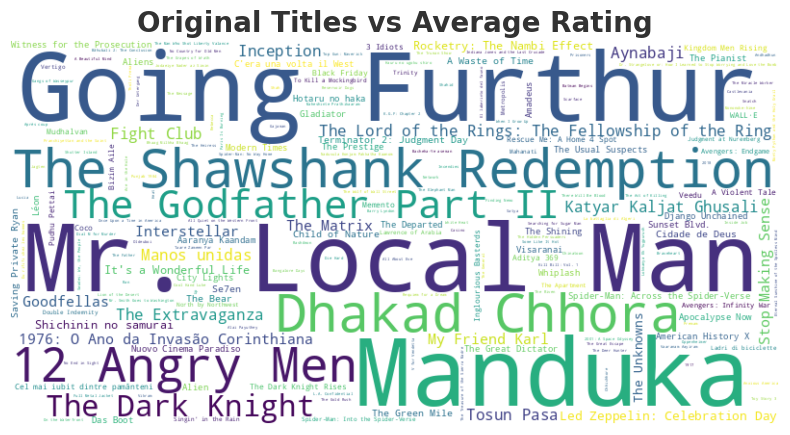

In [65]:
# Word Cloud basado en Original Titles vs Average Rating
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df_cleaned = df.dropna(subset=['originalTitle', 'averageRating', 'numVotes'])
title_rating_dict = df_cleaned.set_index('originalTitle')['averageRating'].to_dict()
wordcloud_rating = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_rating_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_rating, interpolation='bilinear')
plt.title('Original Titles vs Average Rating',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_rating.png", dpi=300, transparent=True)
plt.show()

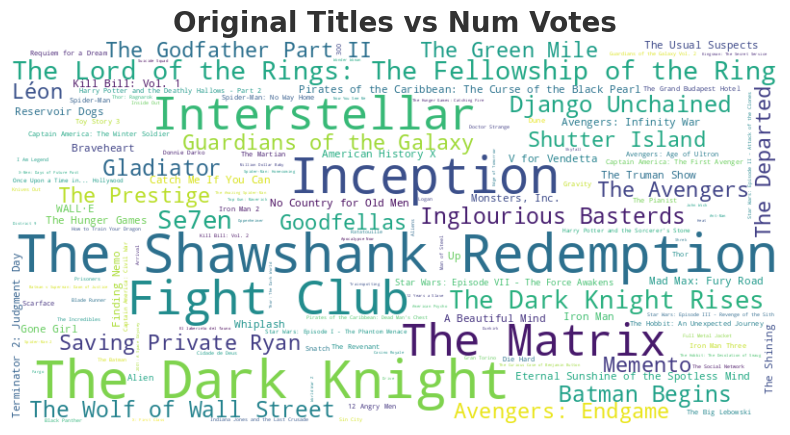

In [66]:
# Word Cloud basado en Original Titles vs Num Votes
title_votes_dict = df_cleaned.set_index('originalTitle')['numVotes'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs Num Votes',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_numVotes.png", dpi=300, transparent=True)
plt.show()

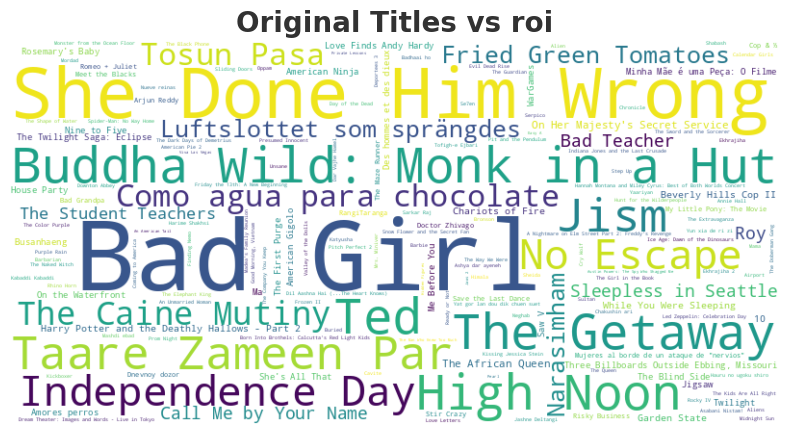

In [67]:
# Word Cloud basado en Original Titles vs roi
title_votes_dict = df_cleaned.set_index('originalTitle')['roi'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs roi',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_roi.png", dpi=300, transparent=True)
plt.show()

# Top: Movie con mayor Rating por año en países top count movies

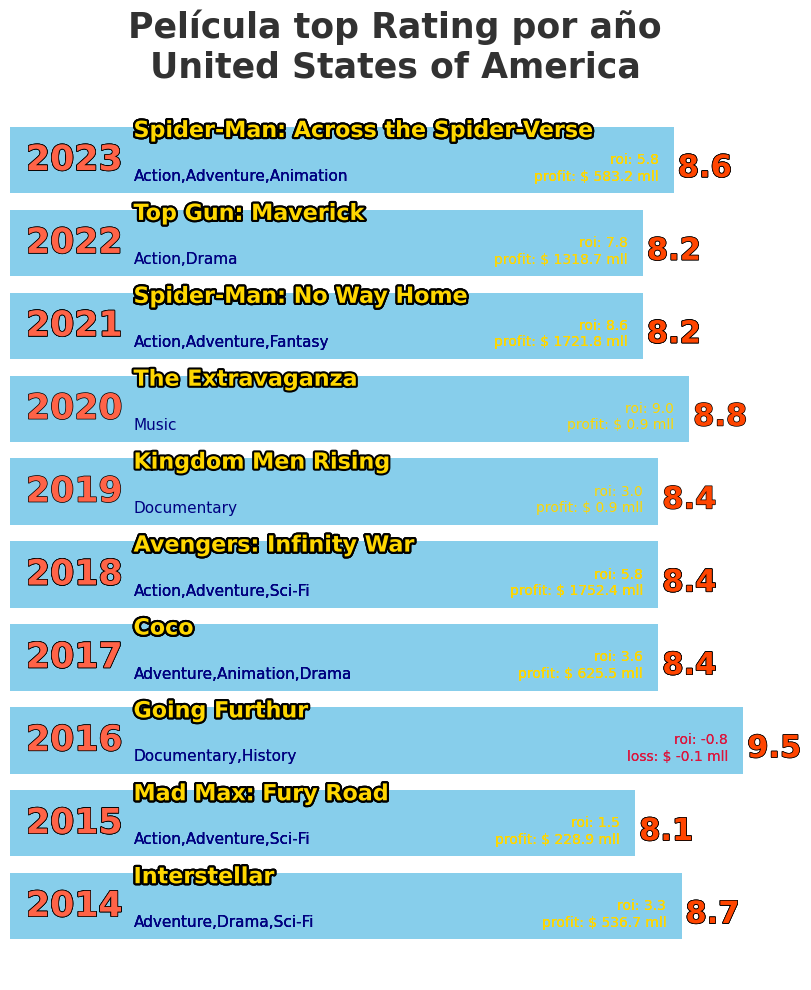

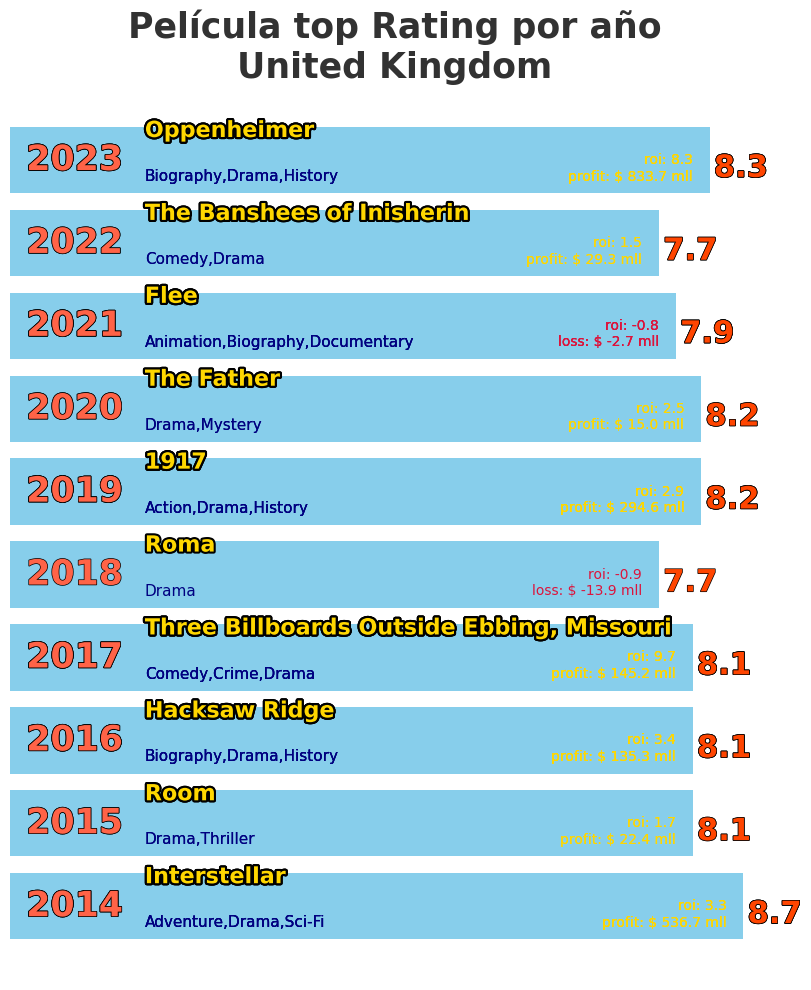

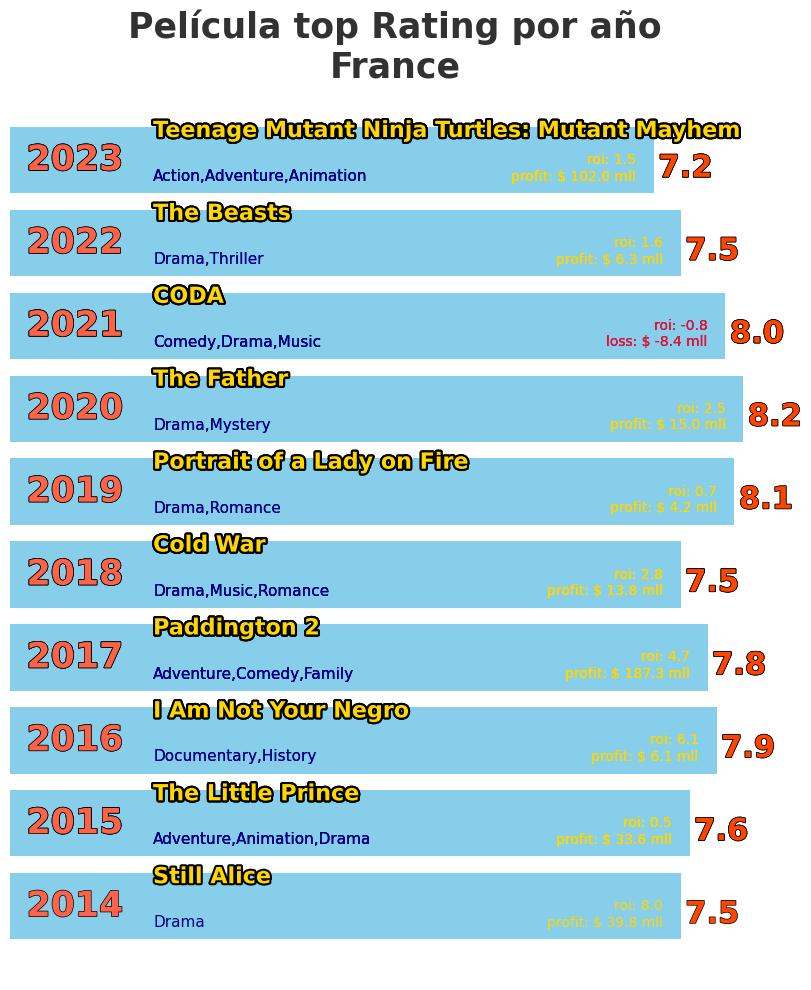

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df = df[df['profit']!=0]

# Explode en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# Explode en la columna 'production_countries'
df = df.assign(production_countries=df['production_countries'].str.split(',')).explode('production_countries').copy()
df['production_countries'] = df['production_countries'].str.strip()


def películas_con_mejor_rating(df, country):
    df_country = df[df['production_countries'] == country]
    best_rated = df_country.loc[df_country.groupby('startYear')['averageRating'].idxmax()]
    return best_rated[['startYear', 'primaryTitle', 'averageRating','genres_x','profit','poster_path','roi','numVotes']]

top_pais=3
top_countries = df['production_countries'].value_counts().nlargest(top_pais).index

results = {country: películas_con_mejor_rating(df, country) for country in top_countries}

### Años ###
initial_year = 2014
final_year = 2023
for country, result in results.items():
    results[country] = result[(result['startYear'] >= initial_year) & (result['startYear'] <= final_year)]

for country, result in results.items():
    plt.figure(figsize=(8, 10),facecolor='none')
    result = result.sort_values('startYear')
    bars = plt.barh(result['startYear'].astype(str), result['averageRating'], color='skyblue')
    plt.title(f'Película top Rating por año\n{country}',fontsize=25,color='#323232',fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.box(on=False)
    plt.grid(False)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(axis='y', length=0)

    lista_url=[]
    for bar, title, rating, genre, startYear, profit, roi in zip(bars, result['primaryTitle'], result['averageRating'],result['genres_x'],result['startYear'],result['profit'],result['roi'] ):
        xval = bar.get_width()
        plt.text(xval + 0.05, (bar.get_y() + bar.get_height() / 2)-.1, f'{rating:.1f}', ha='left', va='center',fontsize=22, color='orangered',fontweight='bold',
                path_effects=[patheffects.withStroke(linewidth=1, foreground='black')])

        plt.text(1.6, (bar.get_y() + bar.get_height() / 2)+ .35, f'{title}', ha='left', va='center',fontsize=16, color='gold',fontweight='bold',
                path_effects=[patheffects.withStroke(linewidth=3, foreground='black')]
                 )
        plt.text(0.05, (bar.get_y() + bar.get_height() / 2), f' {startYear}', ha='left', va='center',fontsize=25,color='tomato',fontweight='bold',
                path_effects=[patheffects.withStroke(linewidth=1, foreground='black')]
)
        plt.text(1.6, (bar.get_y() + bar.get_height() / 2)-.2, f'{genre}', ha='left', va='center',rotation=0,fontsize=11,color='navy')
        plt.text(xval-.2, (bar.get_y() + bar.get_height() / 2)-.2, f'profit: $ {profit/1e6:.1f} mll' if profit >0 else f'loss: $ {profit/1e6:.1f} mll' , ha='right', va='center',rotation=0,fontsize=10,color='gold' if profit >0 else 'crimson')
        plt.text(xval-.2, (bar.get_y() + bar.get_height() / 2), f'roi: {roi:.1f}' if roi >0 else f'roi: {roi:.1f}' , ha='right', va='center',rotation=0,fontsize=10,color='gold' if profit >0 else 'crimson')

    plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/película_top_Rating_x_año_{country}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


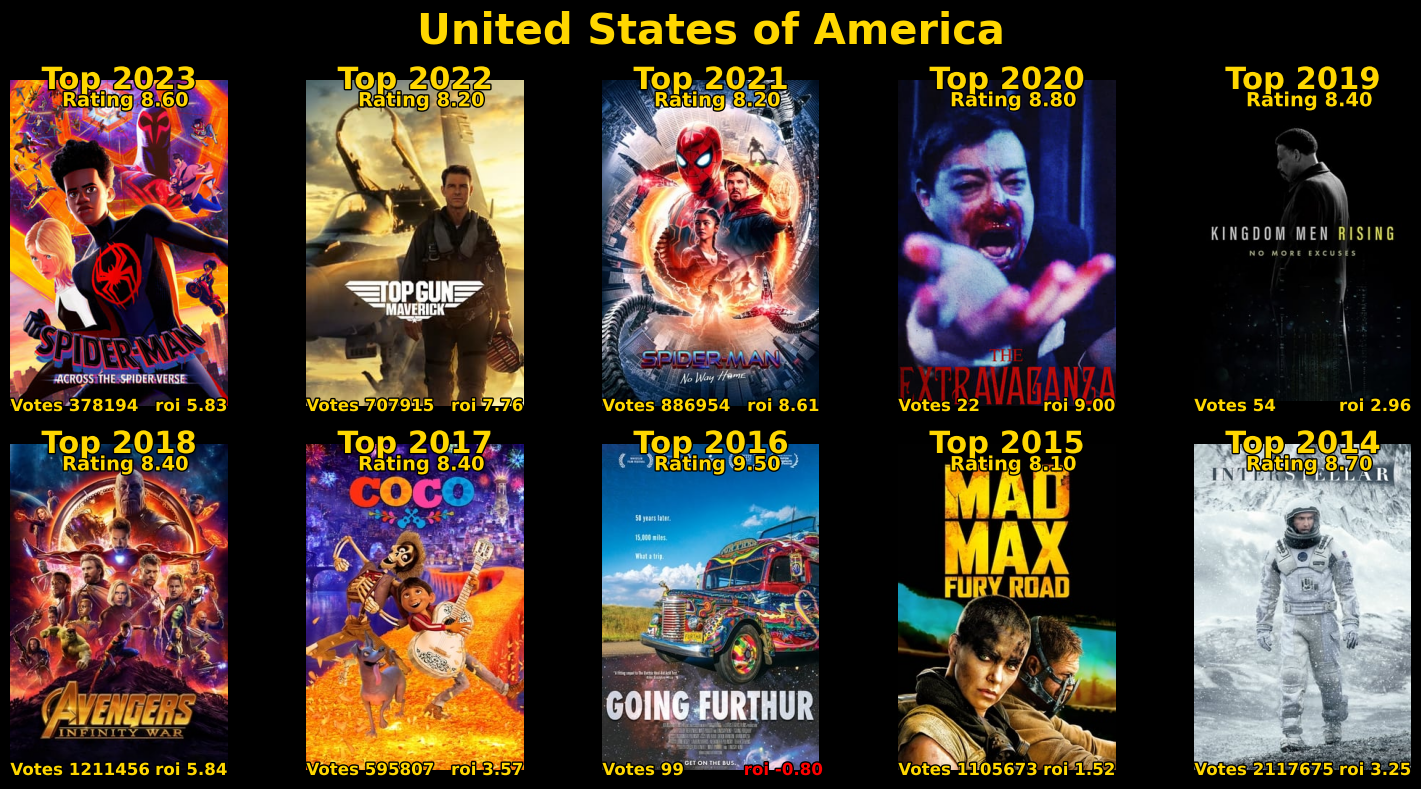

In [112]:
from PIL import Image
import requests
from io import BytesIO
country= 'United States of America'
df_country_01=results[country].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
df_country_01.sort_values('startYear',ascending=False,inplace=True)
image_urls = list(df_country_01.poster_path)

fig, axes = plt.subplots(2, 5, figsize=(15, 8), facecolor='black', sharex=True, sharey=True)

for idx, (ax, img_url,year,averageRating,roi,numVotes) in enumerate(zip(axes.flatten(), image_urls, df_country_01['startYear'], df_country_01['averageRating'], df_country_01['roi'], df_country_01['numVotes']), start=1):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.axis('off')  # Quitar los ejes para que solo se vea la imagen
    ax.text(150, 0, f'Top {year}', color='gold', fontsize=22, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(159, 28, f'Rating {averageRating:.2f}', color='gold', fontsize=14, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(0, 450, f'Votes {numVotes}', color='gold', fontsize=12, ha='left', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(250, 450, f'roi {roi:.2f}', color='gold' if roi>0 else 'red', fontsize=12, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])

fig.suptitle(f'{country}', fontsize=30, color='gold', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Ajustar el rectángulo de dibujo para dejar espacio para el título
plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_{country}_img_url.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [249]:
top_countries

Index(['United States of America', 'United Kingdom', 'France'], dtype='object', name='production_countries')

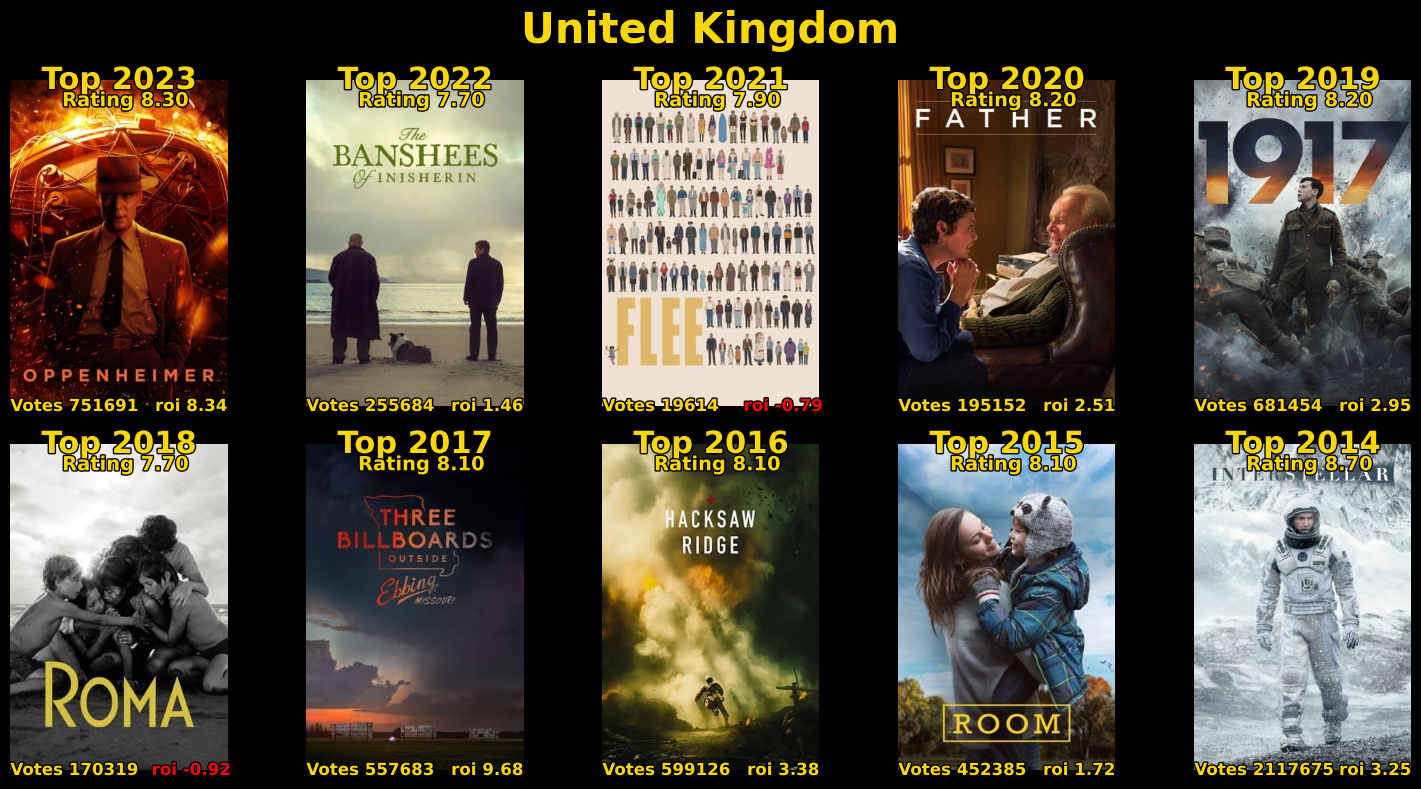

In [111]:
from PIL import Image
import requests
from io import BytesIO

country= 'United Kingdom'
df_country_01=results[country].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
df_country_01.sort_values('startYear',ascending=False,inplace=True)
image_urls = list(df_country_01.poster_path)

fig, axes = plt.subplots(2, 5, figsize=(15, 8), facecolor='black', sharex=True, sharey=True)

for idx, (ax, img_url,year,averageRating,roi,numVotes) in enumerate(zip(axes.flatten(), image_urls, df_country_01['startYear'], df_country_01['averageRating'], df_country_01['roi'], df_country_01['numVotes']), start=1):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.axis('off')  # Quitar los ejes para que solo se vea la imagen
    ax.text(150, 0, f'Top {year}', color='gold', fontsize=22, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(159, 28, f'Rating {averageRating:.2f}', color='gold', fontsize=14, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(0, 450, f'Votes {numVotes}', color='gold', fontsize=12, ha='left', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(250, 450, f'roi {roi:.2f}', color='gold' if roi>0 else 'red', fontsize=12, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])

fig.suptitle(f'{country}', fontsize=30, color='gold', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Ajustar el rectángulo de dibujo para dejar espacio para el título
plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_{country}_img_url.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

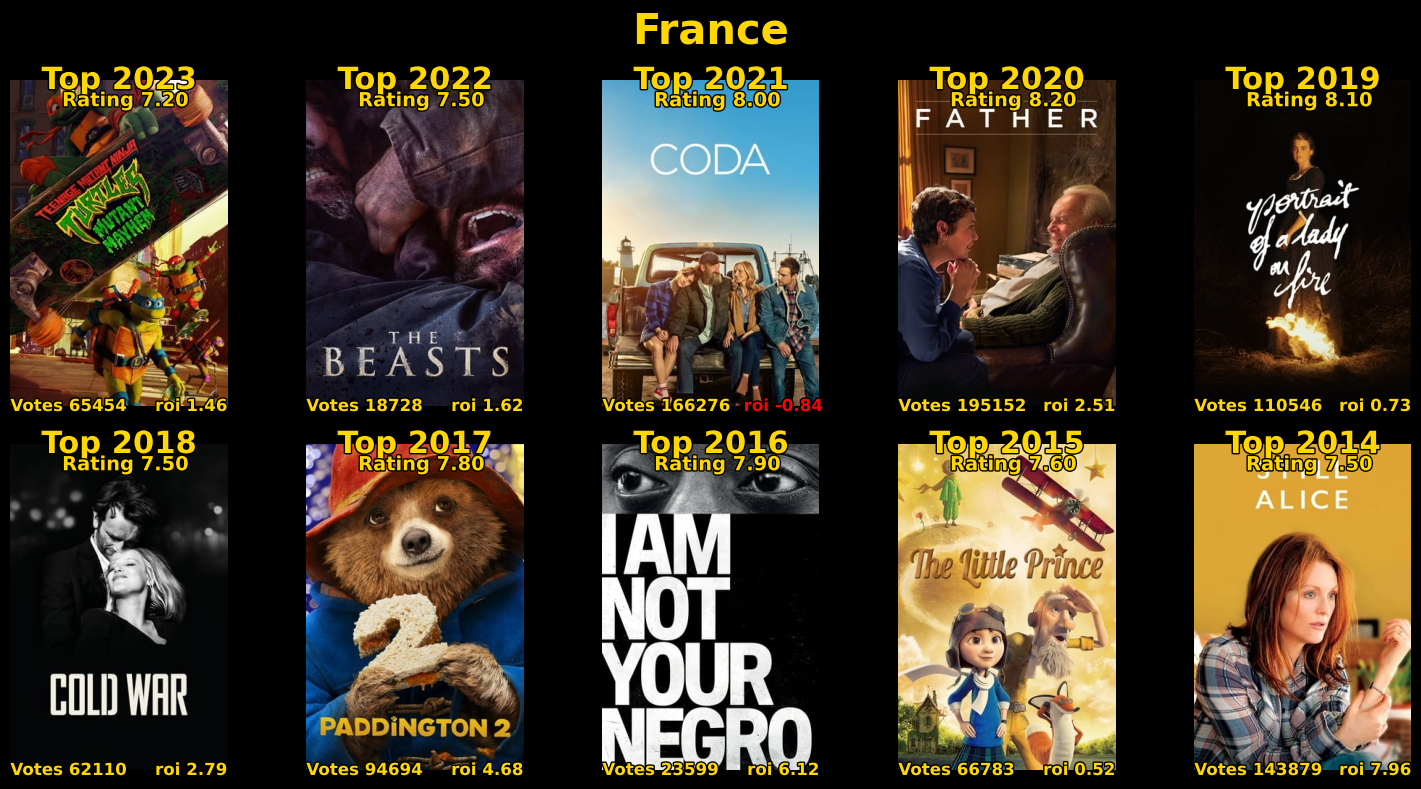

In [110]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.patheffects as patheffects

country = 'France'
df_country_01 = results[country].drop_duplicates()
df_country_01['poster_path'] = df_country_01['poster_path'].apply(lambda x: f"{path_img}{x}")
df_country_01.sort_values('startYear', ascending=False, inplace=True)
image_urls = list(df_country_01.poster_path)

fig, axes = plt.subplots(2, 5, figsize=(15, 8), facecolor='black', sharex=True, sharey=True)

for idx, (ax, img_url, year, averageRating, roi, numVotes) in enumerate(zip(axes.flatten(), image_urls, df_country_01['startYear'], df_country_01['averageRating'], df_country_01['roi'], df_country_01['numVotes']), start=1):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)
    ax.axis('off')  # Quitar los ejes para que solo se vea la imagen
    ax.text(150, 0, f'Top {year}', color='gold', fontsize=22, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(159, 28, f'Rating {averageRating:.2f}', color='gold', fontsize=14, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(0, 450, f'Votes {numVotes}', color='gold', fontsize=12, ha='left', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])
    ax.text(250, 450, f'roi {roi:.2f}', color='gold' if roi > 0 else 'red', fontsize=12, ha='center', va='center', fontweight='bold',
                             path_effects=[patheffects.withStroke(linewidth=2, foreground='black')])

fig.suptitle(f'{country}', fontsize=30, color='gold', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 1])  # Ajustar el rectángulo de dibujo para dejar espacio para el título
plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_{country}_img_url.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


# Lanzamientos mensuales de géneros de películas - años 2014 al 2023 - top 5 por genre.

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df = df[['tconst', 'titleType', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres_x', 'averageRating', 'numVotes', 'release_date', 'budget', 'revenue', 'production_countries', 'vote_average', 'roi', 'profit', 'poster_path']]

### Años ###
initial_year = 2014
final_year = 2023

df['release_date'] = pd.to_datetime(df['release_date'])
df_filtered = df[(df['release_date'].dt.year >= initial_year) & (df['release_date'].dt.year <= final_year)]

# Explode la columna 'genres_x'
df_exploded = df_filtered.assign(genre=df_filtered['genres_x'].str.split(',')).explode('genre')
df_exploded.drop(columns='genres_x', inplace=True)

# Agregar columnas adicionales para día, semana y mes
df_exploded['day'] = df_exploded['release_date'].dt.day_name()
df_exploded['week'] = df_exploded['release_date'].dt.isocalendar().week
df_exploded['month'] = df_exploded['release_date'].dt.month_name()

# Agrupar por 'month' y 'genre' para contar el número de películas por cada combinación
genre_month_counts = df_exploded.groupby(['month', 'genre']).size().reset_index(name='count')
genre_month_counts.sort_values(by=['month', 'count'], ascending=[True, False], inplace=True)
genre_month_counts.head()

month      genre  count
7  April      Drama     75
0  April     Action     61
4  April     Comedy     50
5  April      Crime     35
1  April  Adventure     28

In [53]:
# Pivotar el DataFrame para que los géneros sean columnas y los meses sean filas
genre_month_pivot = genre_month_counts.pivot_table(index='genre', columns='month', values='count', fill_value=0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
genre_month_pivot = genre_month_pivot[month_order].sort_values('January', ascending=False)
genre_month_pivot.head()

month      January  February  March  April  May  June  July  August  \
genre                                                                 
Drama           83       108     91     75   83    82    65      93   
Comedy          67        80     58     50   63    59    67      66   
Action          65        62     56     61   62    61    65      83   
Adventure       40        36     53     28   45    48    47      50   
Thriller        31        30     27     24   28    22    28      34   

month      September  October  November  December  
genre                                              
Drama            154      142       109       107  
Comedy            68       73        64        62  
Action            74       57        43        68  
Adventure         48       42        32        56  
Thriller          55       41        23        24

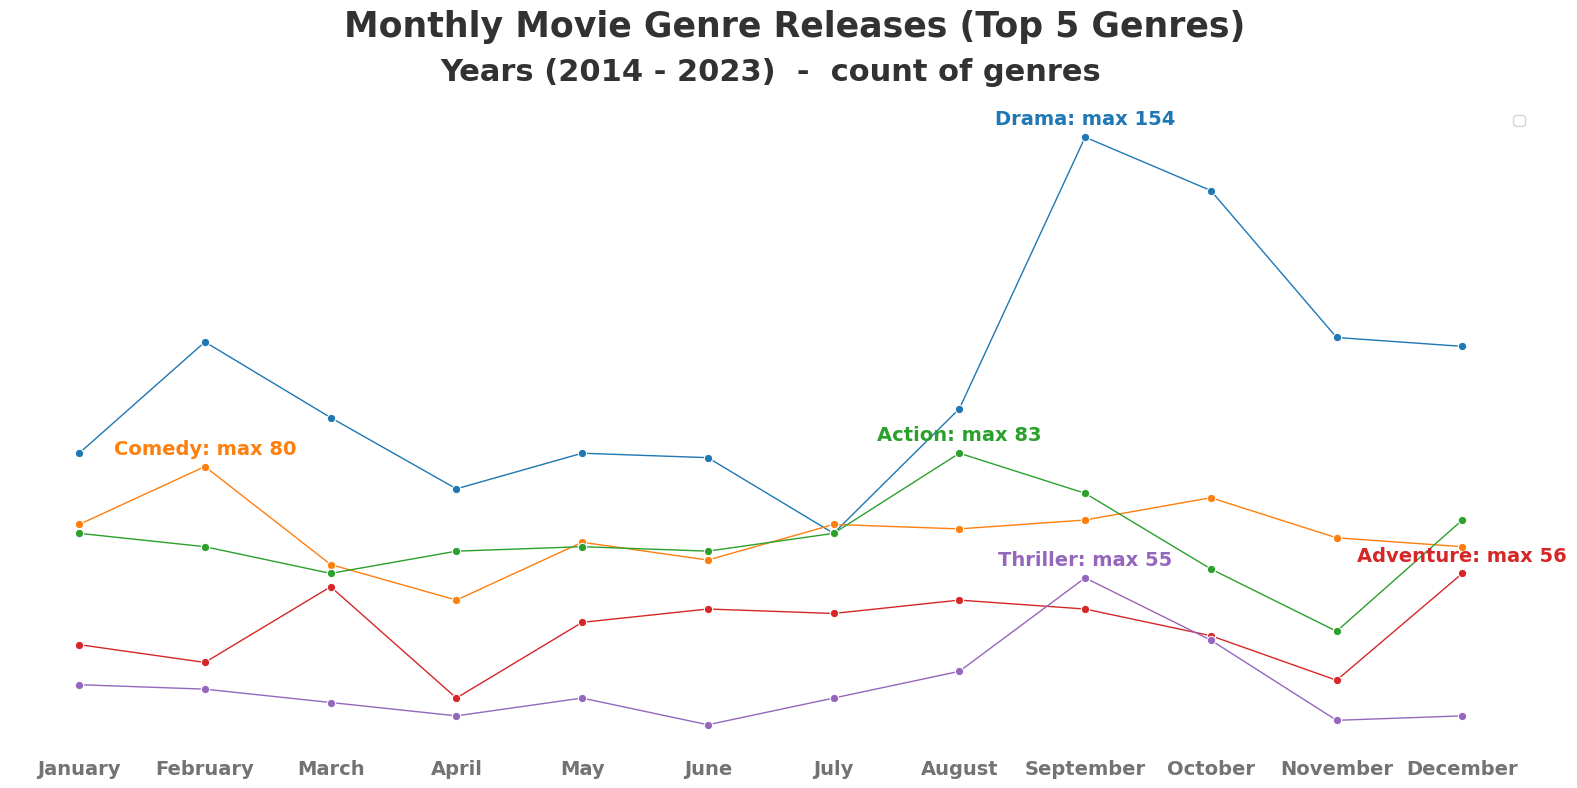

In [54]:
top=5
top_genres = genre_month_pivot.head(top)
top_genres.reset_index(inplace=True)
top_genres_melted = top_genres.melt(id_vars='genre', var_name='month', value_name='count')

plt.figure(figsize=(16, 8),facecolor='none')
sns.lineplot(data=top_genres_melted, x='month', y='count', hue='genre', marker='o',linewidth=1,palette='tab10')

palette = sns.color_palette('tab10', n_colors=top)

for idx, genre in enumerate(top_genres['genre']):
    genre_data = top_genres_melted[top_genres_melted['genre'] == genre]
    max_row = genre_data.loc[genre_data['count'].idxmax()]
    plt.text(max_row['month'], max_row['count']+2, f'{genre}: max {max_row["count"]}',
             color=palette[idx], weight='bold', fontsize=14, ha='center', va='bottom')
plt.xlabel('')
plt.ylabel('')
plt.suptitle(f'Monthly Movie Genre Releases (Top {top} Genres)', fontsize=25, color='#323232',fontweight='bold')
plt.title(f'Years ({initial_year} - {final_year})  -  count of genres', fontsize=22, color='#323232',fontweight='bold',pad=20)

plt.xticks(rotation=0, horizontalalignment='center',fontweight='bold',fontsize=14,color='#737373')
plt.yticks([])
plt.gca().tick_params(axis='x', length=0)

plt.tight_layout()
plt.box(on=False)
plt.grid(False)
plt.legend([])
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/monthly_movie_genre_releases.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


## Análisis de la gráfica:
La gráfica muestra los cinco géneros con mayor producción según los meses del año entre los años 2014 y 2023.

*   Drama y Thriller: con máximo en Septiembre.
*   Action: máximo en Agosto.
*   Comedy: máximo en Febrero.
*   Adventure: máximo en Diciembre.

Siguiento este análisis podemos visualizar los máximos para cada genero y establecer un calendario de recomendaciones.


